# Here we just want some validation plots in terms of the VAE, RNA and protein differences

We want to:

1. Plot the correlation between VAE diff and protein logFC for certain pathways so that we can see if it fits...

In [1]:
#gene,term

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Output_Data/mean_Integrated_comparison_Late-Early.csv')
df

id RG2_Changes_filtered  Integrated padj (Late-Early)  \
0     C1orf112             MDE_TMDS                      0.650835   
1         GCLC             MDE_TMDS                      0.885669   
2        MYH16             MDE_TMDS                      0.544537   
3         AOC1             MDE_TMDS                      0.265974   
4        HECW1             MDE_TMDS                      0.059949   
...        ...                  ...                           ...   
2786     UBE2C                 TPDE                      0.681323   
2787  MARCKSL1                 TPDE                      0.667991   
2788     KPNA2                 TPDE                      0.817618   
2789     KRT14                 TPDE                      0.227305   
2790      JPT1                 TPDE                      0.051570   

      Integrated pval (Late-Early)  Integrated diff (Late-Early)  \
0                         0.443161                      0.053416   
1                         0.769598                     -0.014134   
2                         0.319318                      0.174807   
3                         0.093962                     -0.294518   
4                         0.003672                     -0.259635   
...                            ...                           ...   
2786                      0.478768                     -0.069379   
2787                      0.361076                     -0.083747   
2788                      0.717254                      0.048006   
2789                      0.034271                      0.390430   
2790                      0.002788                     -0.384941   

      mannwhitneyu stat (Late-Early)  Integrated mean (Early)  \
0                             3964.0                 0.132174   
1                             4363.0                -0.247974   
2                             3878.0                -0.797730   
3                             4882.0                -0.395450   
4                             5344.0                 0.076750   
...                              ...                      ...   
2786                          3986.0                 0.606253   
2787                          3909.0                 0.374972   
2788                          4389.0                 0.538829   
2789                          5048.0                -0.710858   
2790                          3129.0                 0.426748   

      Integrated mean (Late)  Protein-LogFC mean (Late-Early)  \
0                   0.185591                         0.000000   
1                  -0.262108                        -0.110191   
2                  -0.622923                         0.000000   
3                  -0.689968                         0.000000   
4                  -0.182885                         0.000000   
...                      ...                              ...   
2786                0.536875                         0.060576   
2787                0.291225                        -0.036182   
2788                0.586835                         0.032563   
2789               -0.320428                         0.096617   
2790                0.041807                        -0.253358   

      RNA-LogFC mean (Late-Early)  CpG-LogFC mean (Late-Early)  entrezgene_id  \
0                       -0.062532                    -0.010414        55732.0   
1                       -0.495048                    -0.038856         2729.0   
2                        0.156616                    -0.011335            0.0   
3                       -0.643947                    -0.028248           26.0   
4                       -0.425797                     0.003721        23072.0   
...                           ...                          ...            ...   
2786                    -0.433428                     0.028652        11065.0   
2787                    -0.081735                     0.000696        65108.0   
2788                    -0.207898                    -0.002478         3838

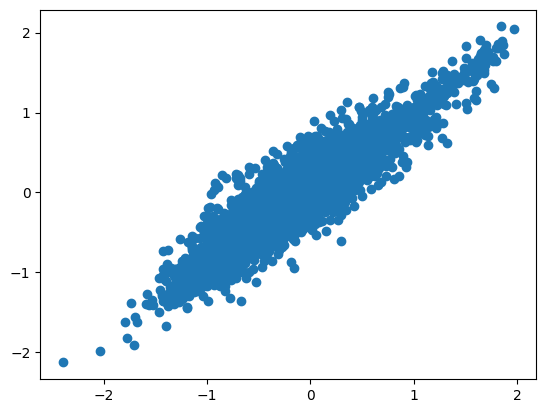

In [2]:
plt.scatter(df['Integrated mean (Early)'], df['Integrated mean (Late)'])

In [26]:
pathway = pd.read_csv('Required_Refs/GSEA/41467_2016_BFncomms13041_MOESM340_ESM.csv')

pathway_dict = {}
for p in set(pathway.term.values):
    pathway_dict[p] = list(pathway[pathway.term == p].gene.values)

In [27]:
for p in pathway_dict:
    if 'OXIDATIVE' in p or 'CYCLE' in p or 'METH' in p:
        print(p)
        
for p in pathway_dict:
    if 'Oxidative' in p or 'cycle' in p or 'Steroid' in p or 'Meth' in p or 'Tryp' in p or 'Glut' in p or 'O-Glycan Biosynthesis' in p:
        print(p)

Glutamate metabolism
Oxidative Phosphorylation
Glutathione Metabolism
O-Glycan Biosynthesis
DNA Methylation
Steroid Metabolism
Histone Methylation
Tryptophan metabolism
Methionine Metabolism


In [28]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 8)
plt.rcParams['svg.fonttype'] = 'none'

for k in ['O-Glycan Biosynthesis',
            'Steroid Metabolism', 
         'Tryptophan metabolism']:
    path_df = df[df.id.isin(pathway_dict[k])]
    lbls = path_df['RG2_Changes_filtered'].values
    path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
    path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
    path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)
    print(f'\n{k}\n')
    print('\n'.join([c.split(' ')[0] for c in path_df['id'].values]))


# HNSC
# LUAD
# LUSC
# PAAD


O-Glycan Biosynthesis

B3GNT6
GCNT3
GALNT14
GALNT7

Steroid Metabolism

UGT1A10
AKR1C4
SLCO1B3
HSD17B1
CYP19A1
DHCR24
ABCC1
TM7SF2
SLCO1B1
AKR1C1
SULT1A1
HMGCS2
CYP11A1

Tryptophan metabolism

TDO2
INMT
KYNU
HAAO
SLC7A5
ALDH2
MAOB
MAOA


/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/964214514.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/964214514.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/964214

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/1457905715.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/1457905715.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/145790

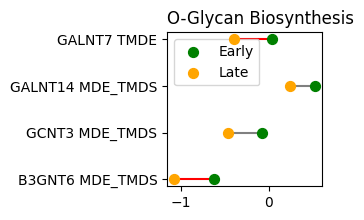

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/1457905715.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/1457905715.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/145790

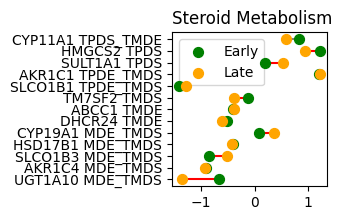

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/1457905715.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/1457905715.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/145790

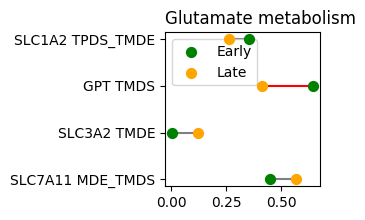

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/1457905715.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/1457905715.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/145790

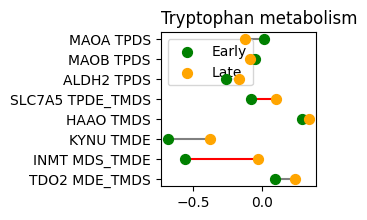

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/1457905715.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/1457905715.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/145790

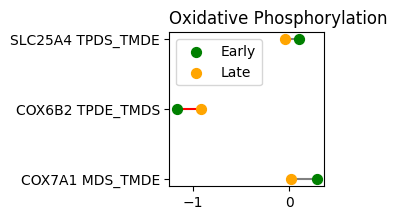

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/1457905715.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/1457905715.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/145790

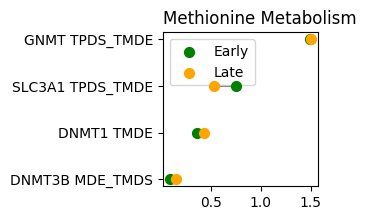

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/1457905715.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/1457905715.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/145790

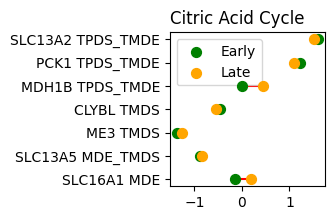

In [33]:
plt.rcParams["figure.figsize"] = (2, 2)
plt.rcParams['svg.fonttype'] = 'none'

for k in ['O-Glycan Biosynthesis', 'Steroid Metabolism', 'Glutamate metabolism', 'Tryptophan metabolism', 'Oxidative Phosphorylation', 'Methionine Metabolism', 'Citric Acid Cycle']:
    path_df = df[df.id.isin(pathway_dict[k])]
    lbls = path_df['RG2_Changes_filtered'].values
    path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
    path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
    path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)
    x3 = path_df['id'].values
    y3_new = path_df['Integrated mean (Late)'].values
    y2_new = path_df['Integrated mean (Early)'].values
    line_colours = ['red' if p < 0.05 else 'grey' for p in path_df['Integrated pval (Late-Early)'].values]


    plt.figure()
    plt.hlines(y=x3, xmin = y3_new , xmax = y2_new, color=line_colours)
    plt.scatter(y2_new, x3, color='green', s=50, label='Early', zorder=10)
    plt.scatter(y3_new, x3, color='orange', s=50 , label='Late', zorder=10)
    plt.legend(loc="upper left")

    # # Add title and axis names
    plt.title(k, loc='left')
    plt.savefig(f'Output_Figures/Pathways/{k}.svg')
    plt.show()


/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2738595440.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2738595440.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/273859

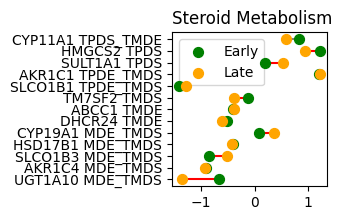

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2738595440.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2738595440.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/273859

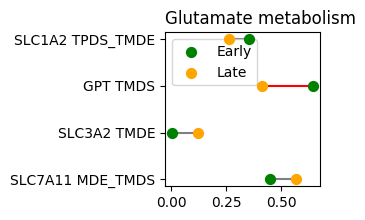

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2738595440.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2738595440.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/273859

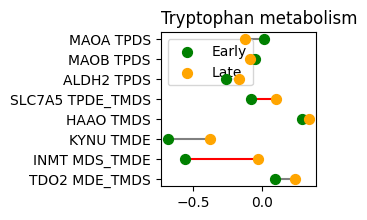

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2738595440.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2738595440.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/273859

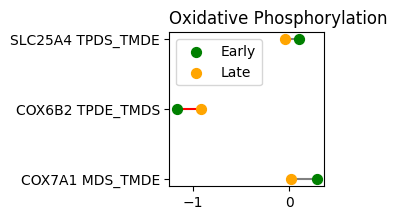

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2738595440.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2738595440.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/273859

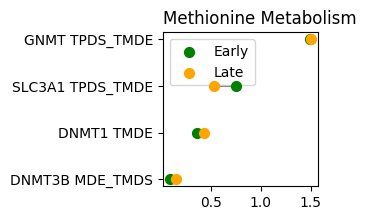

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2738595440.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2738595440.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/273859

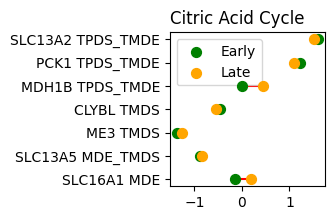

In [30]:
plt.rcParams["figure.figsize"] = (2, 2)
plt.rcParams['svg.fonttype'] = 'none'

for k in ['Steroid Metabolism', 'Glutamate metabolism', 'Tryptophan metabolism', 'Oxidative Phosphorylation', 'Methionine Metabolism', 'Citric Acid Cycle']:
    path_df = df[df.id.isin(pathway_dict[k])]
    lbls = path_df['RG2_Changes_filtered'].values
    path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
    path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
    path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)
    x3 = path_df['id'].values
    y3_new = path_df['Integrated mean (Late)'].values
    y2_new = path_df['Integrated mean (Early)'].values
    line_colours = ['red' if p < 0.05 else 'grey' for p in path_df['Integrated pval (Late-Early)'].values]


    plt.figure()
    plt.hlines(y=x3, xmin = y3_new , xmax = y2_new, color=line_colours)
    plt.scatter(y2_new, x3, color='green', s=50, label='Early', zorder=10)
    plt.scatter(y3_new, x3, color='orange', s=50 , label='Late', zorder=10)
    plt.legend(loc="upper left")

    # # Add title and axis names
    plt.title(k, loc='left')
    plt.savefig(f'Output_Figures/Pathways/{k}.svg')
    plt.show()


/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/3896126042.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/3896126042.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


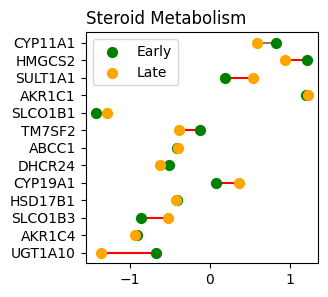

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/3896126042.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/3896126042.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


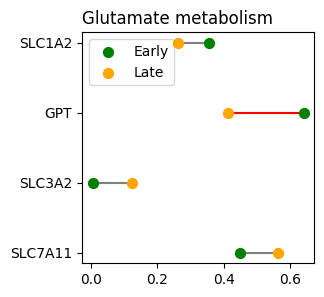

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/3896126042.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/3896126042.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


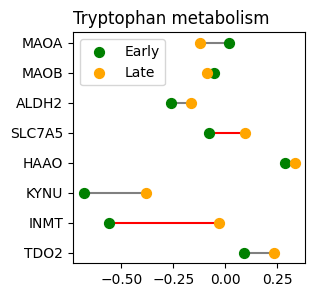

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/3896126042.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/3896126042.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


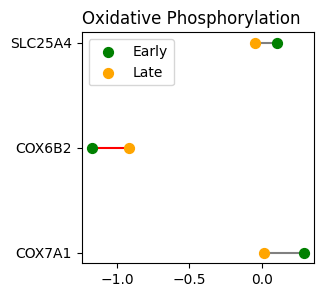

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/3896126042.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/3896126042.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


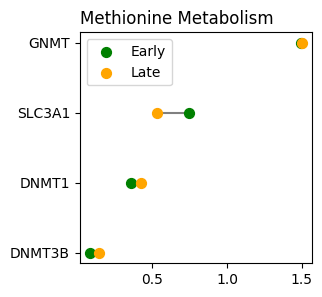

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/3896126042.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/3896126042.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


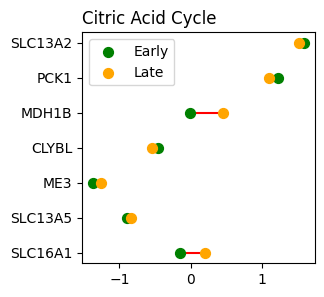

In [8]:
plt.rcParams["figure.figsize"] = (3, 3)
plt.rcParams['svg.fonttype'] = 'none'

for k in ['Steroid Metabolism', 'Glutamate metabolism', 'Tryptophan metabolism', 'Oxidative Phosphorylation', 'Methionine Metabolism', 'Citric Acid Cycle']:
    path_df = df[df.id.isin(pathway_dict[k])]
    lbls = path_df['RG2_Changes_filtered'].values
    #path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
    path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
    path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)
    x3 = path_df['id'].values
    y3_new = path_df['Integrated mean (Late)'].values
    y2_new = path_df['Integrated mean (Early)'].values

    line_colours = ['red' if p < 0.05 else 'grey' for p in path_df['Integrated pval (Late-Early)'].values]

    plt.figure()
    plt.hlines(y=x3, xmin = y3_new , xmax = y2_new, color=line_colours, alpha=1.0)
    plt.scatter(y2_new, x3, color='green', s=50, label='Early', zorder=10)
    plt.scatter(y3_new, x3, color='orange', s=50 , label='Late', zorder=10)
    plt.legend(loc="upper left")

    # # Add title and axis names
    plt.title(k, loc='left')
    plt.savefig(f'Output_Figures/Pathways/{k}.svg')
    plt.show()


/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


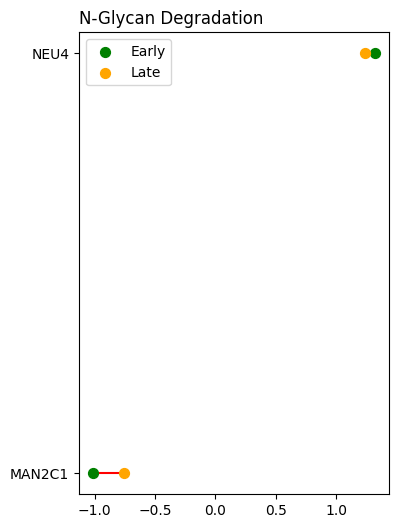

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


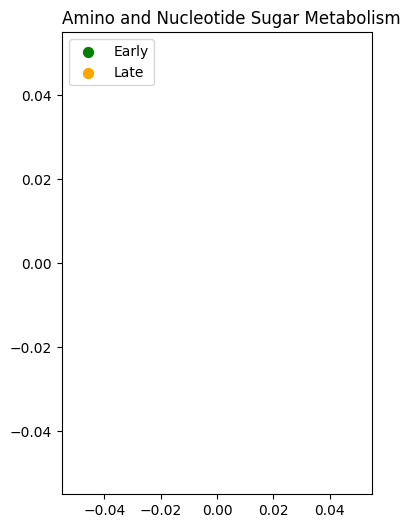

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


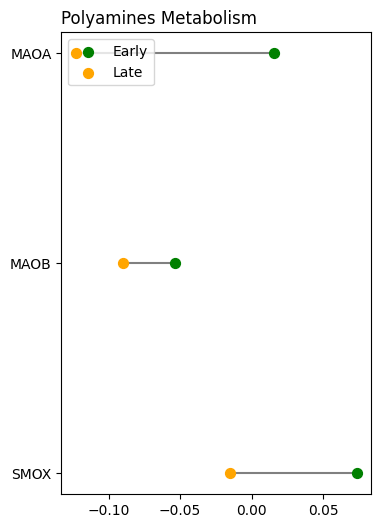

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


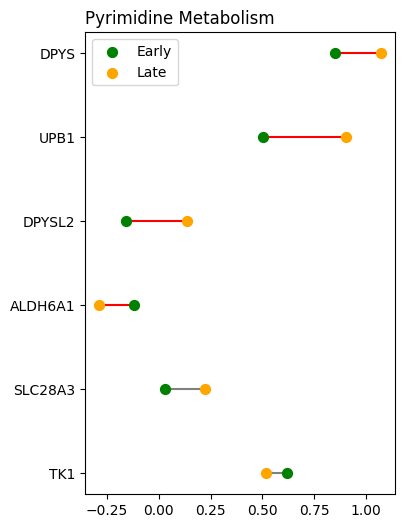

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


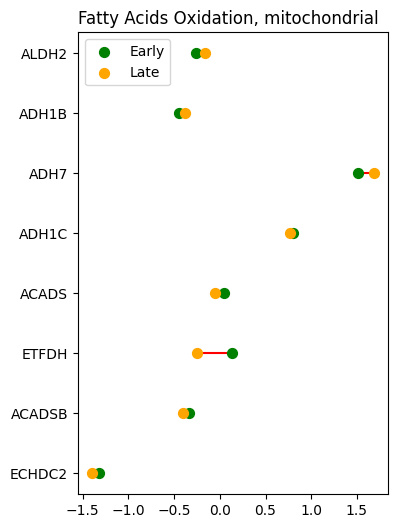

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


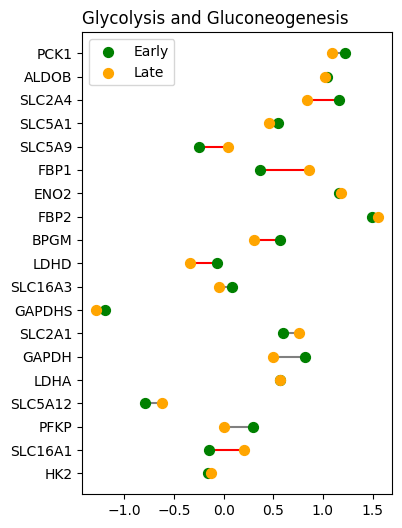

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


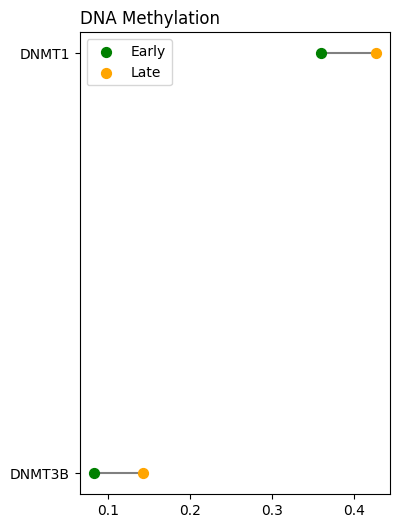

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


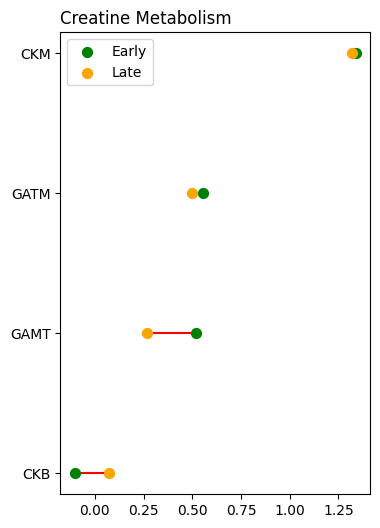

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


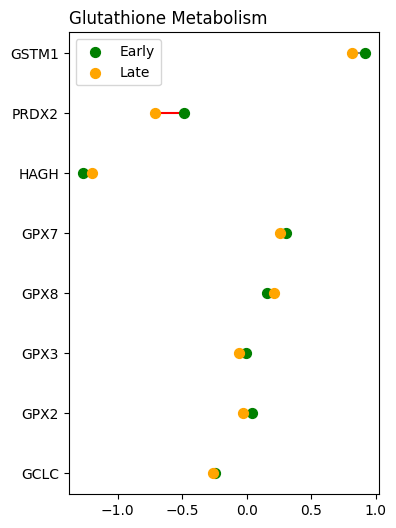

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


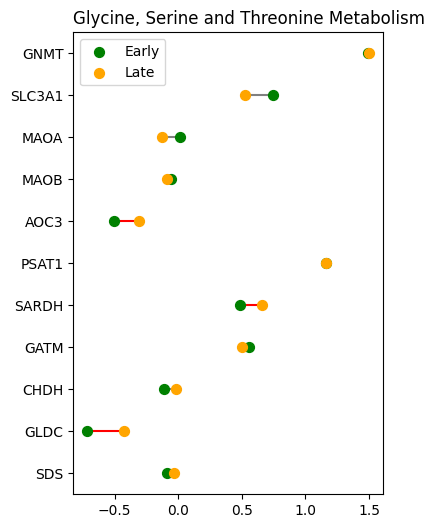

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


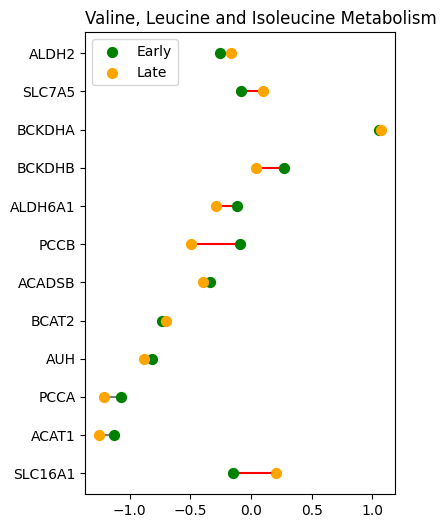

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


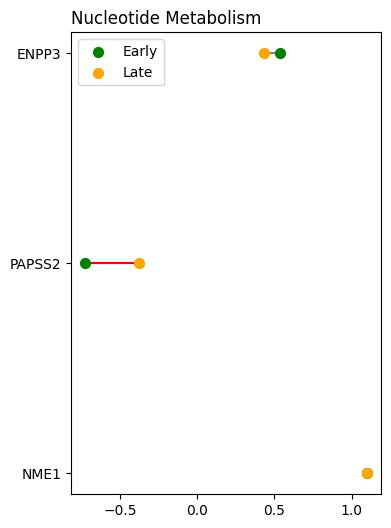

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


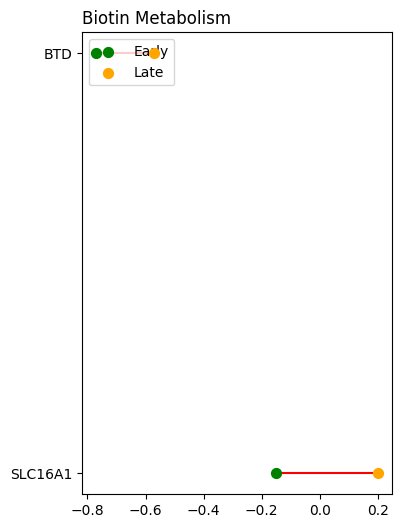

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


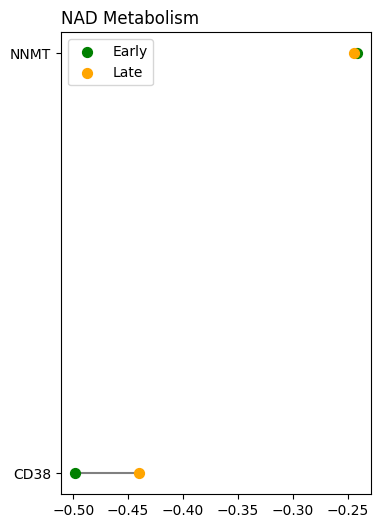

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


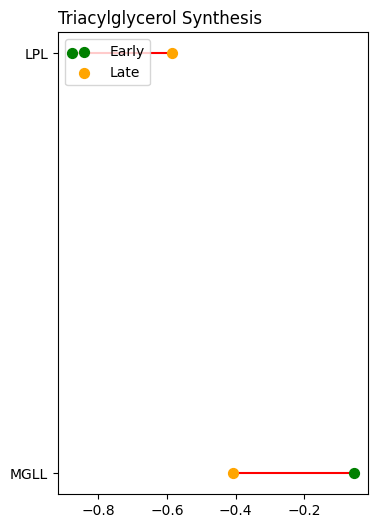

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


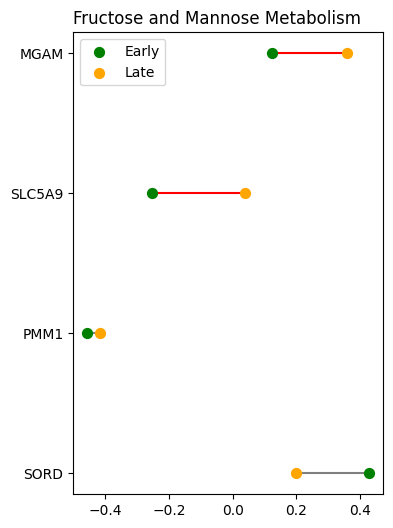

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


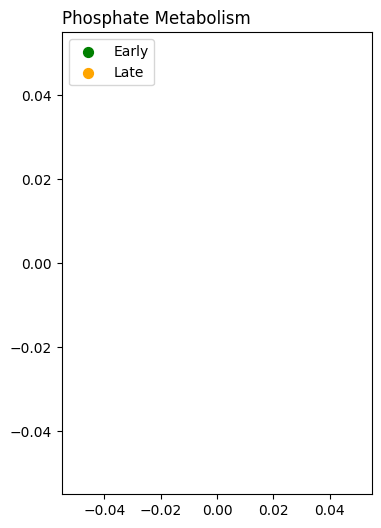

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


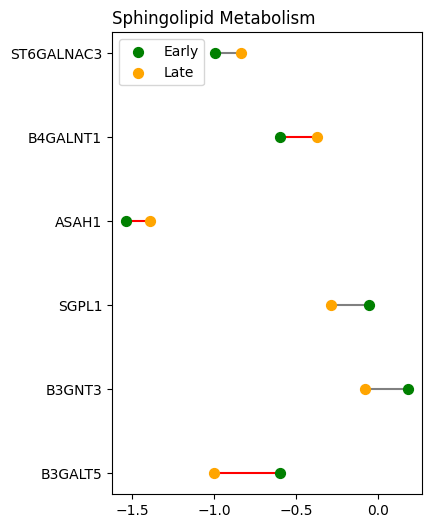

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


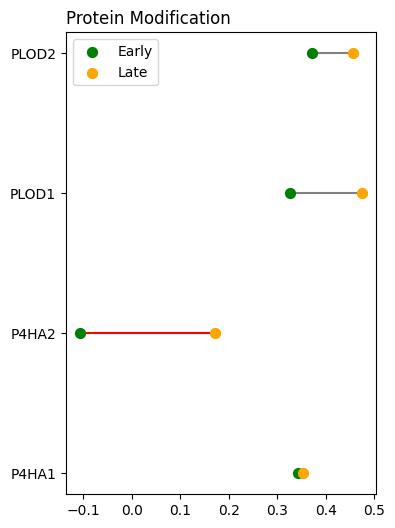

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


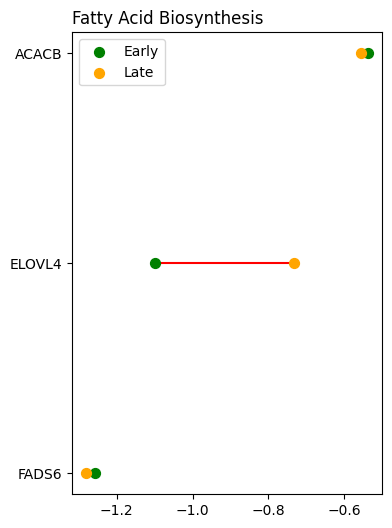

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


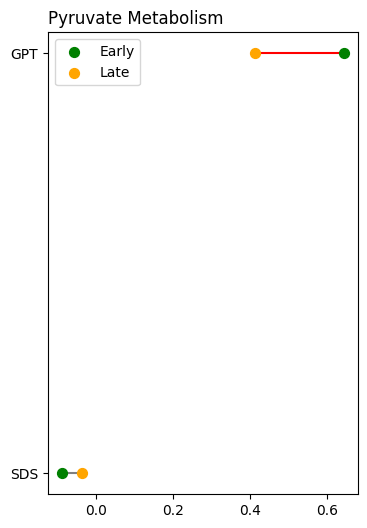

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


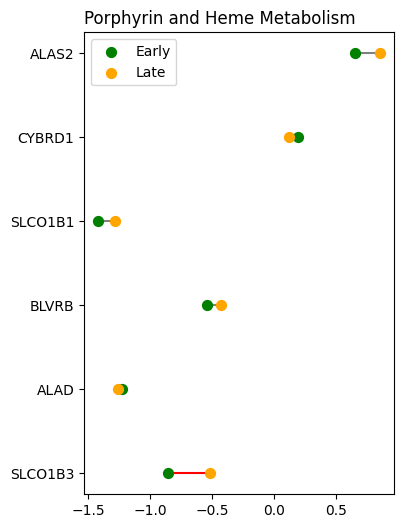

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


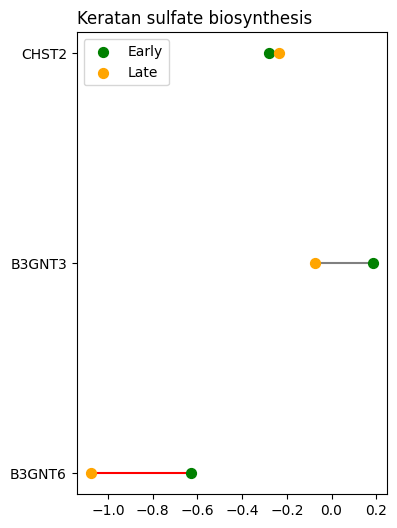

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


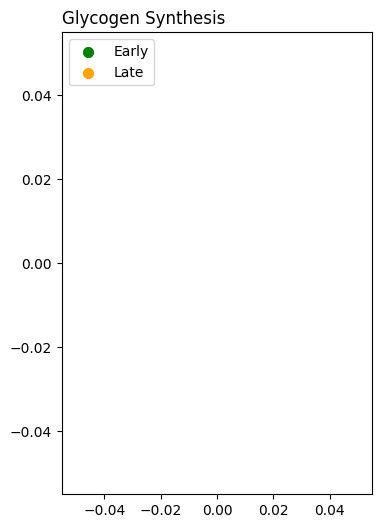

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


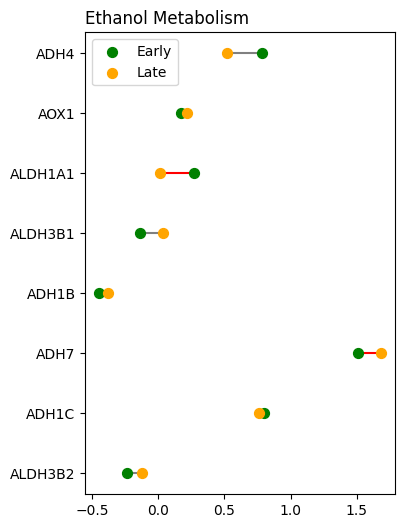

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


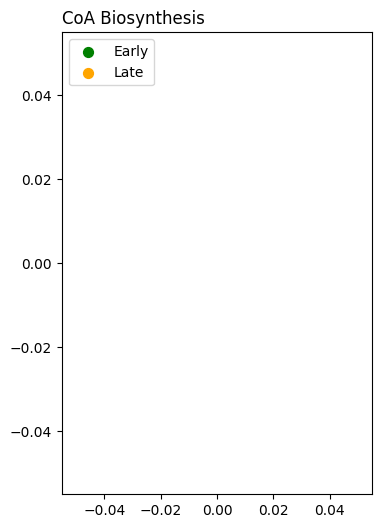

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


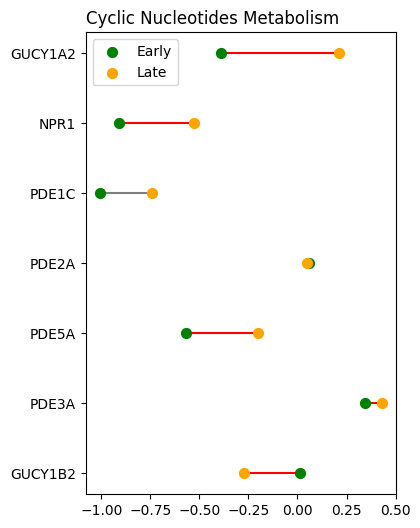

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


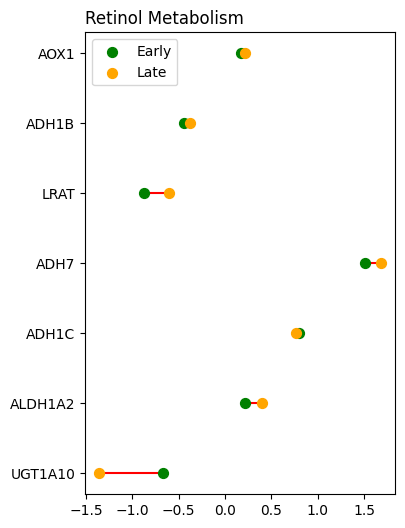

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


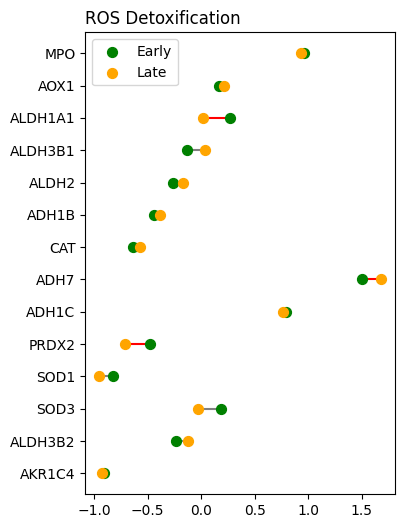

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


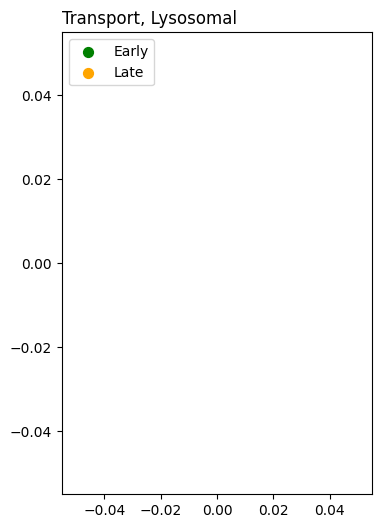

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


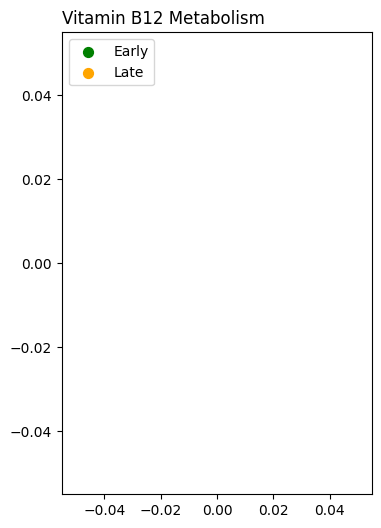

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


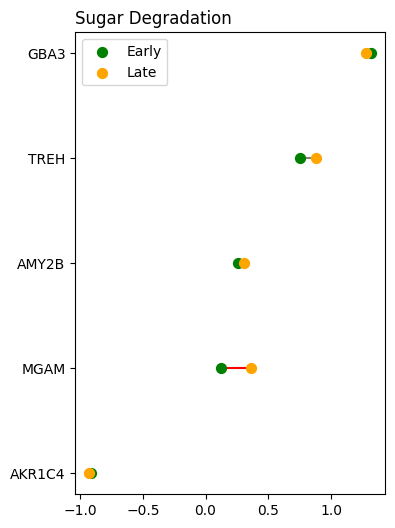

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


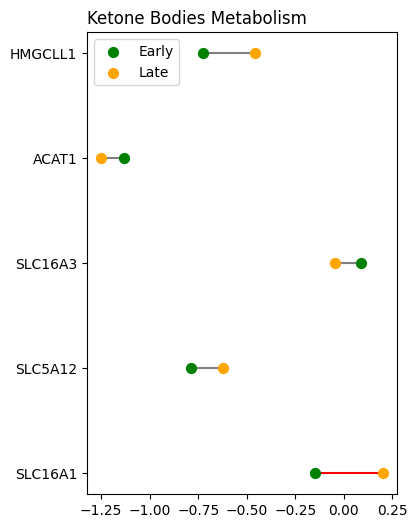

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


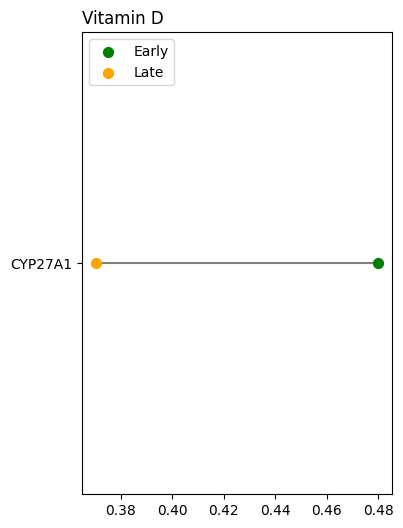

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


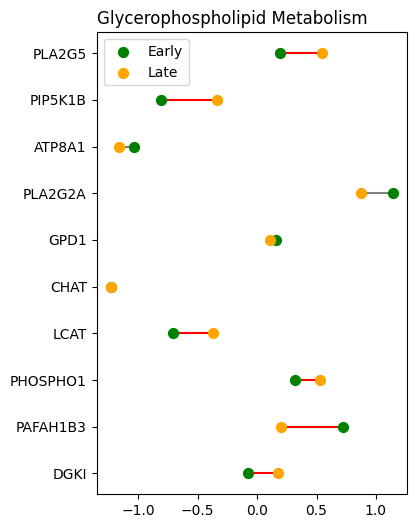

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


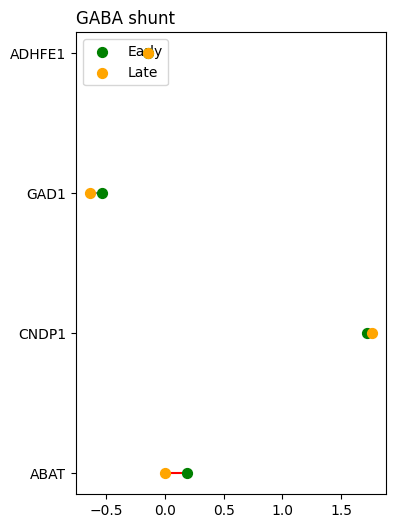

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


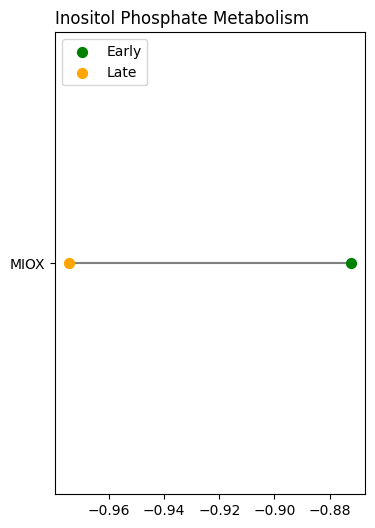

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


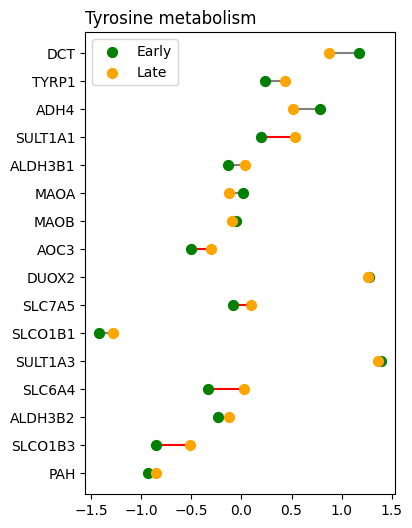

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


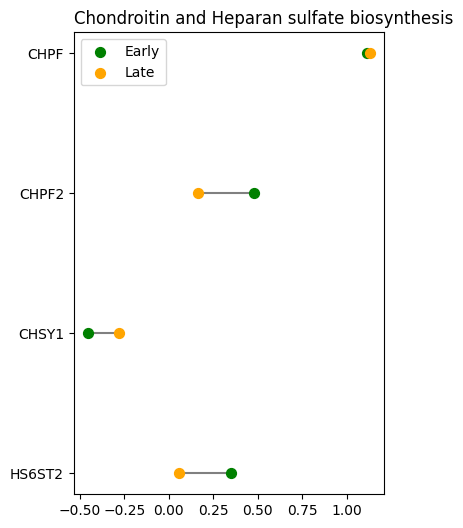

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


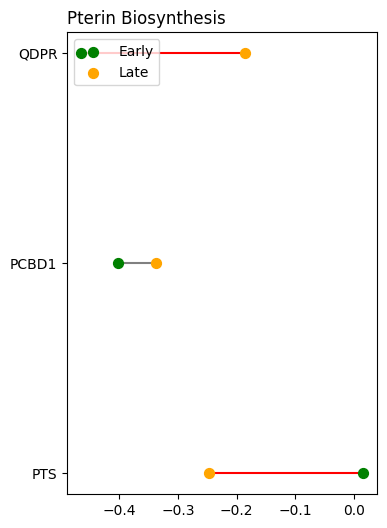

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


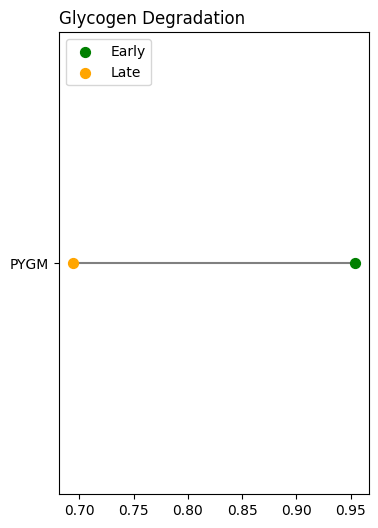

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


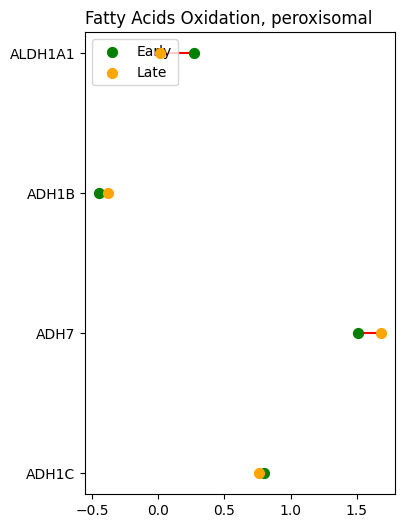

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


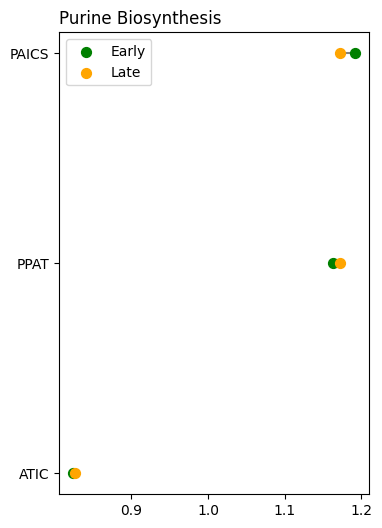

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


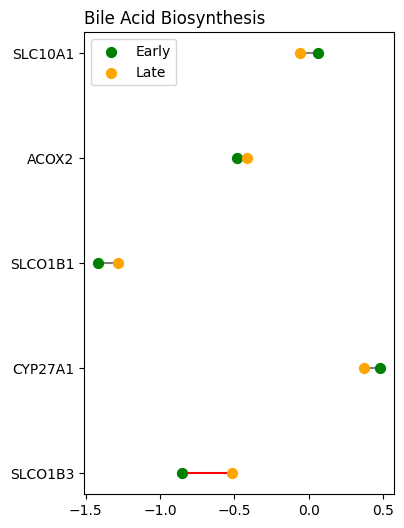

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


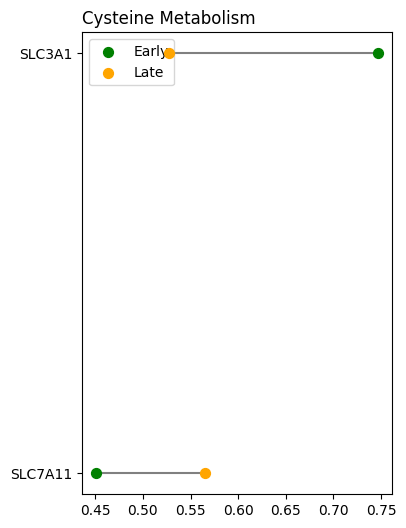

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


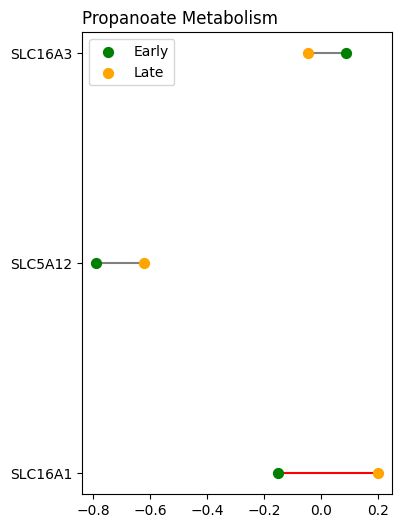

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


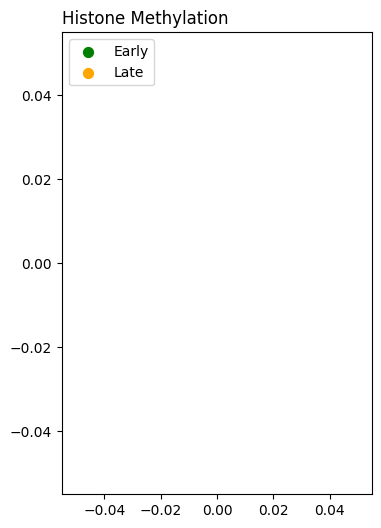

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


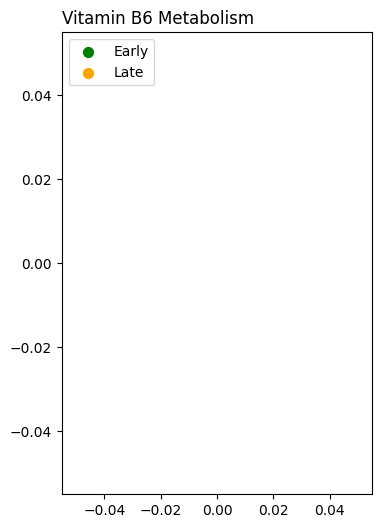

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


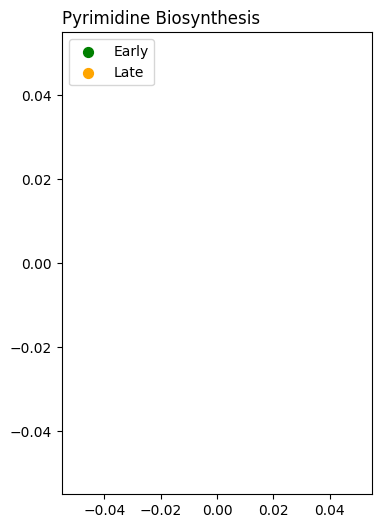

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


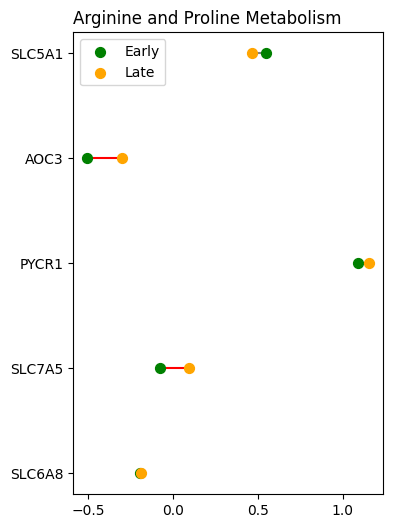

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


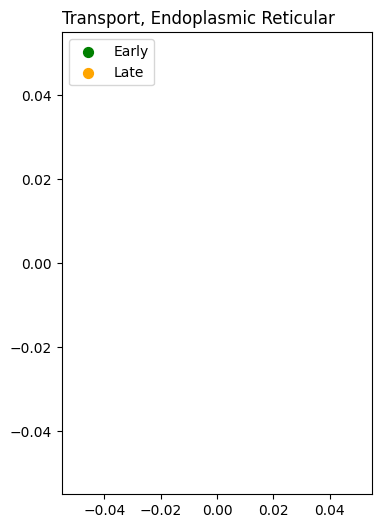

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


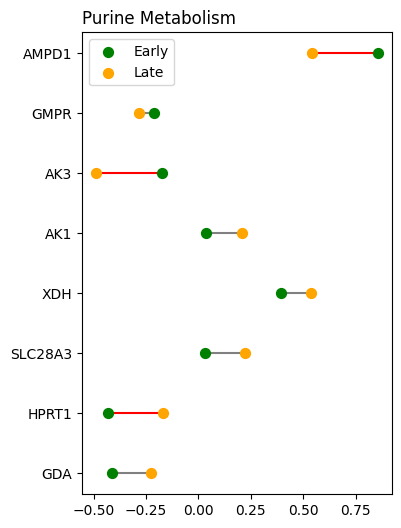

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


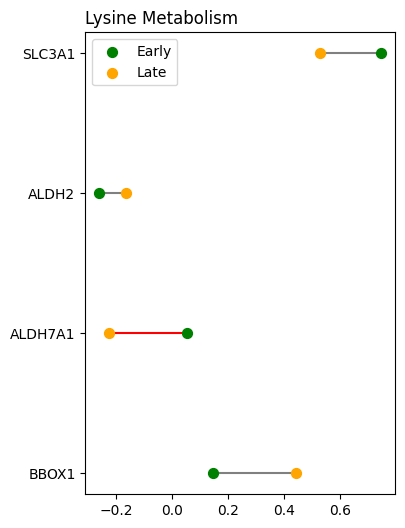

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


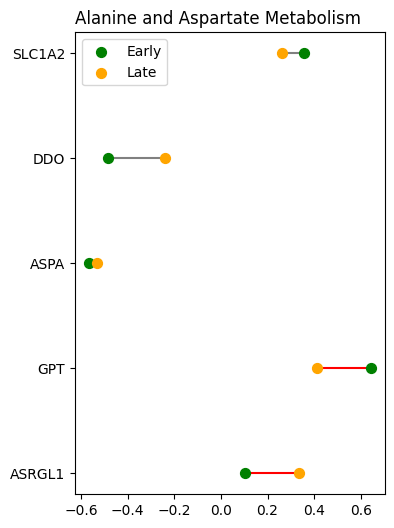

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


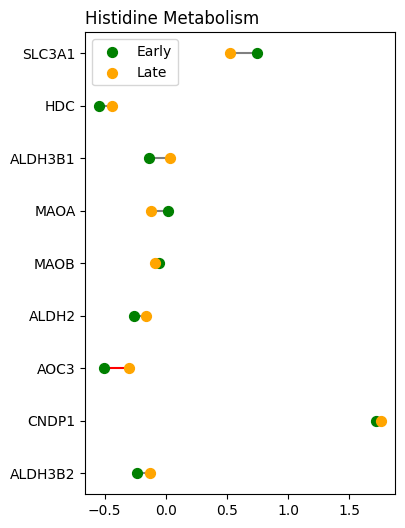

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


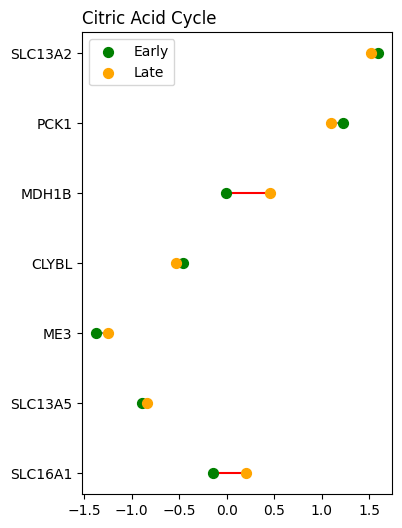

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


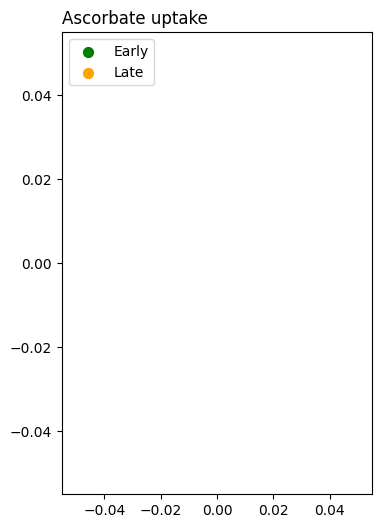

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


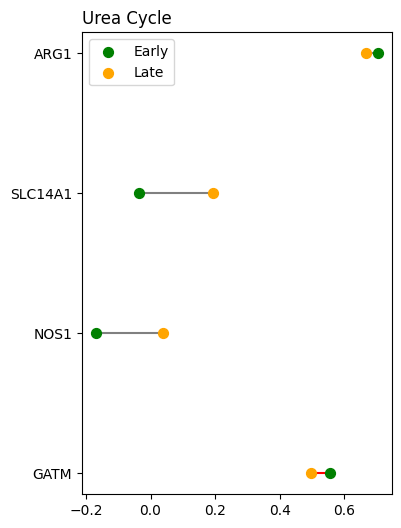

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


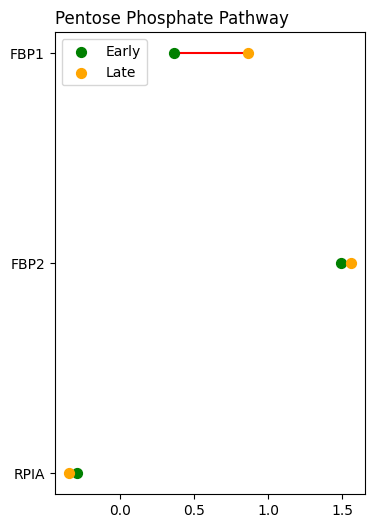

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


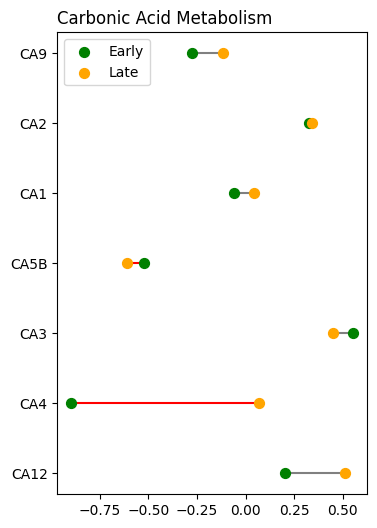

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


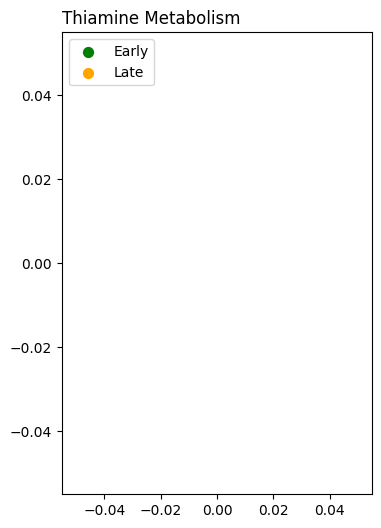

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


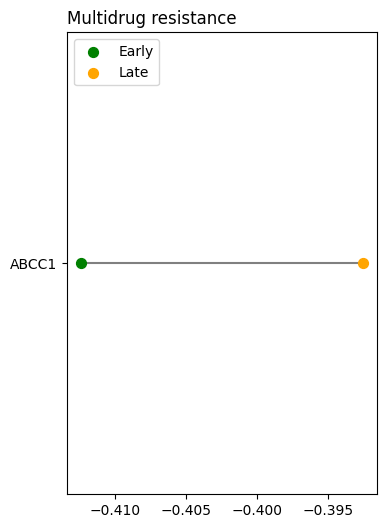

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


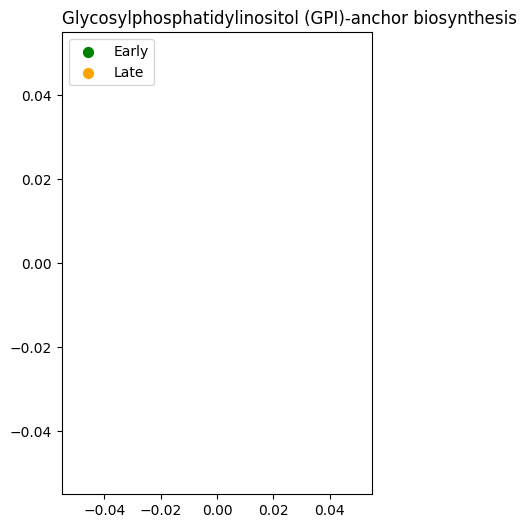

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


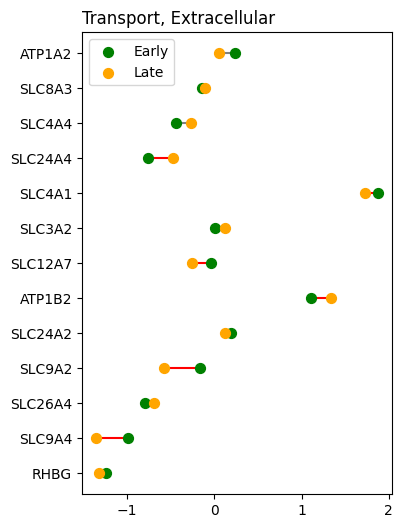

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


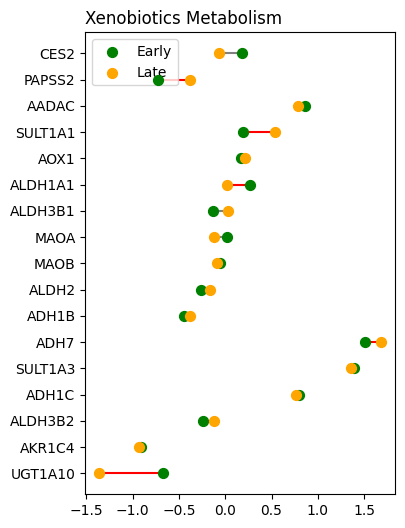

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


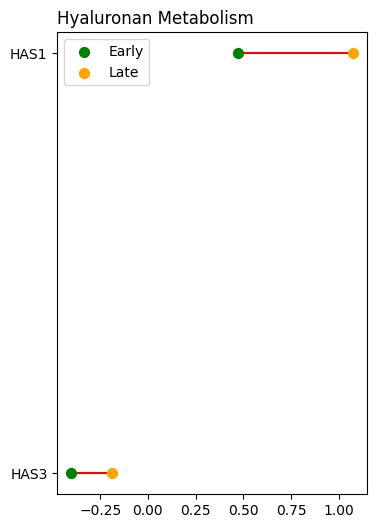

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


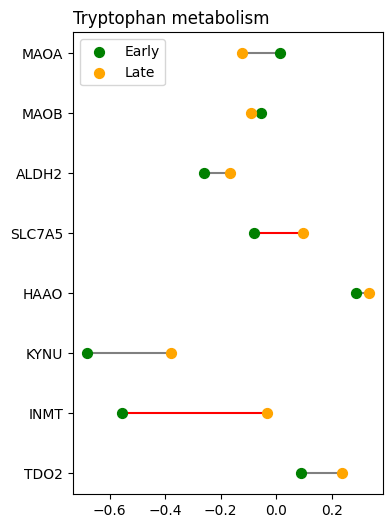

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


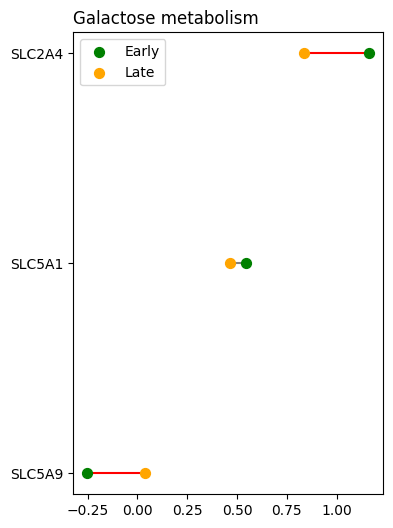

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


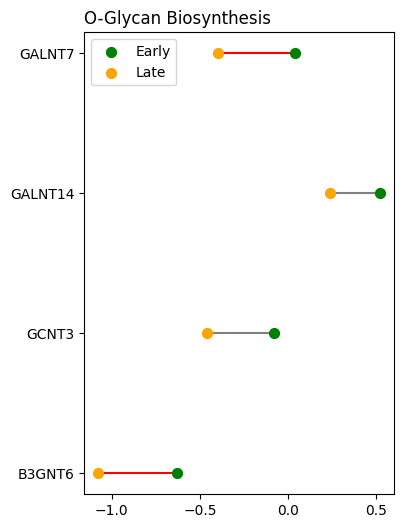

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


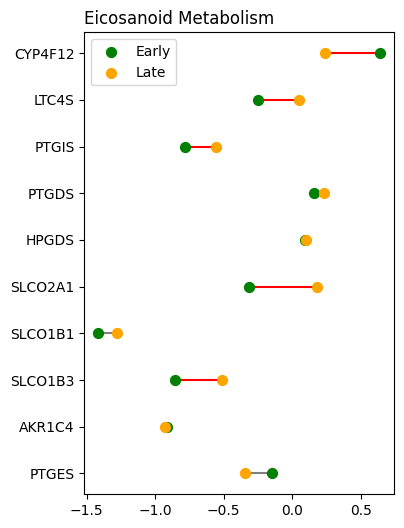

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


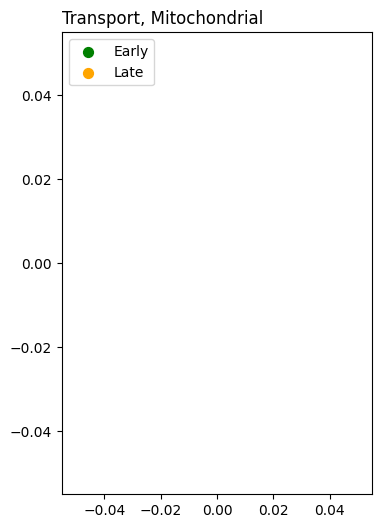

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


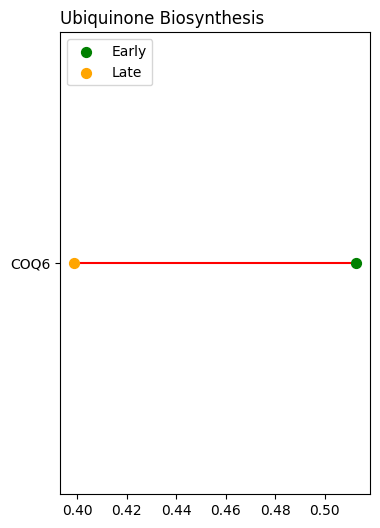

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


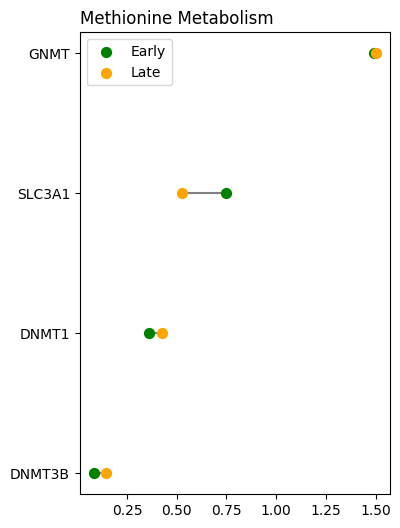

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


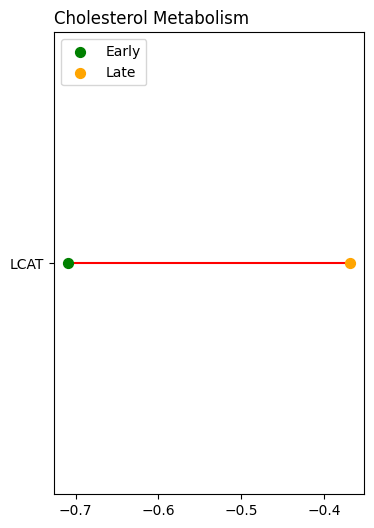

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


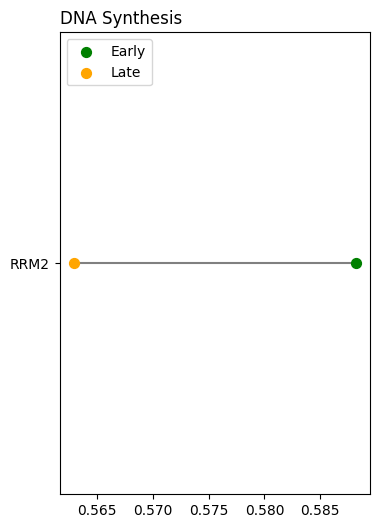

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


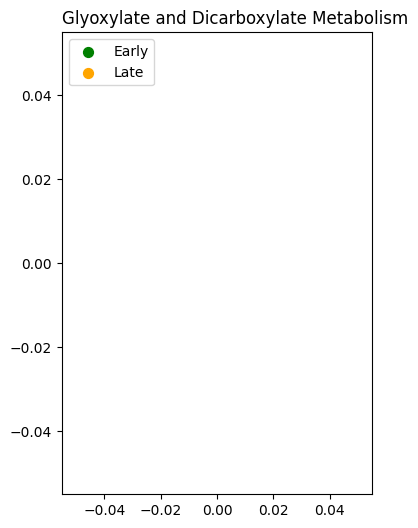

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


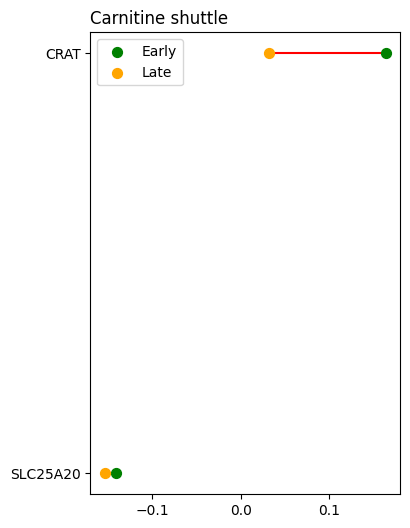

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


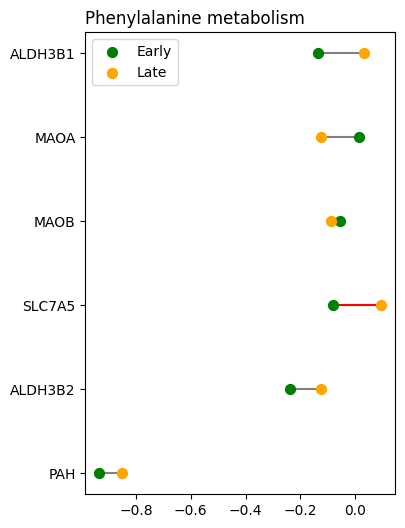

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


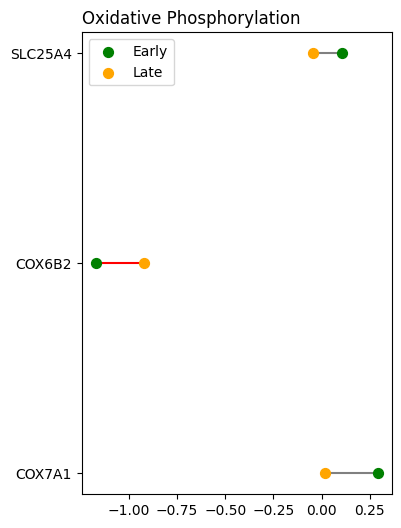

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


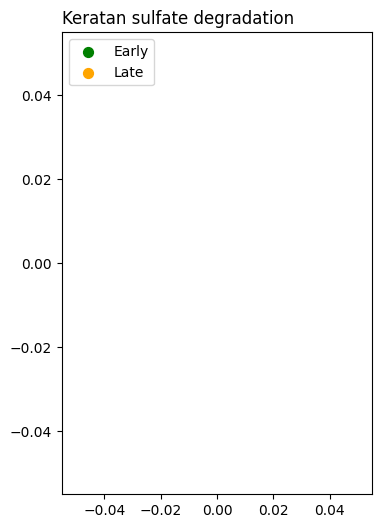

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


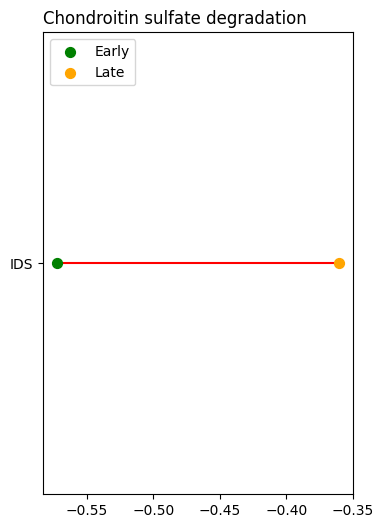

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


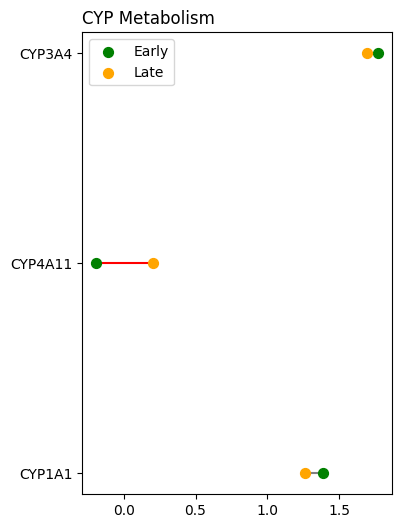

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


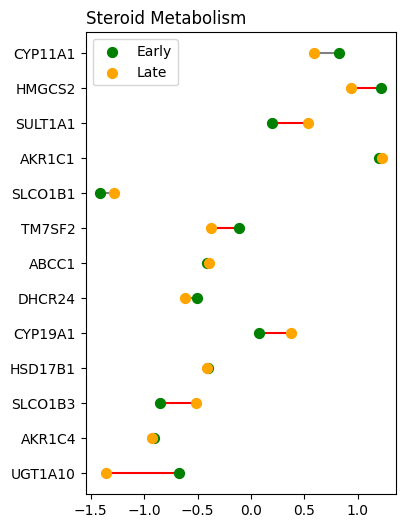

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


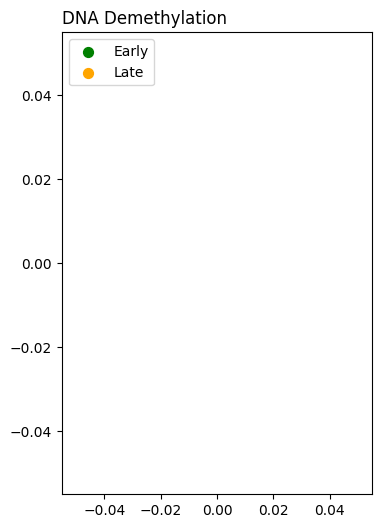

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


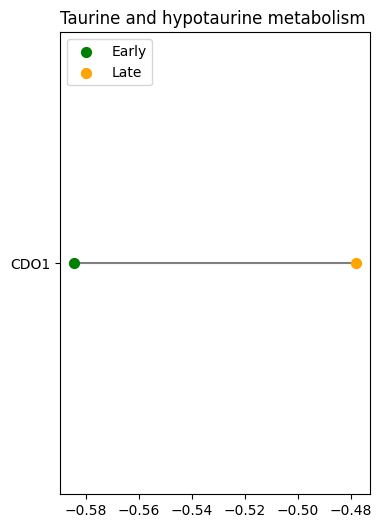

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


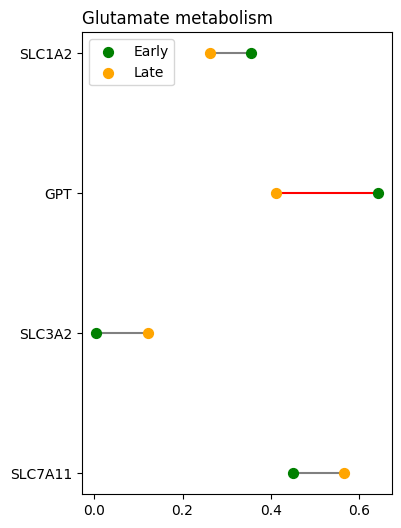

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


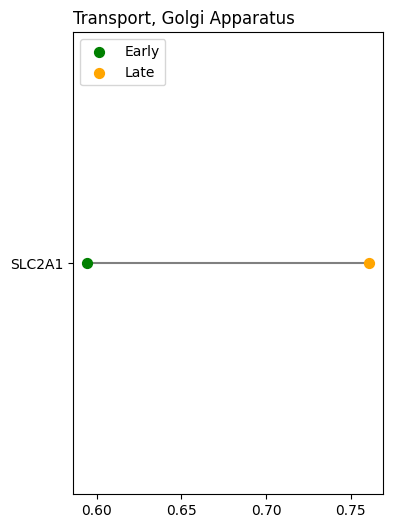

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


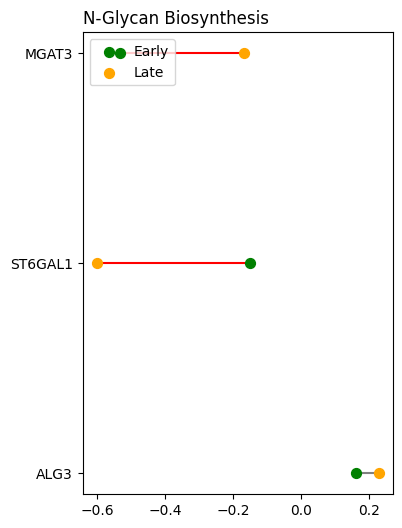

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


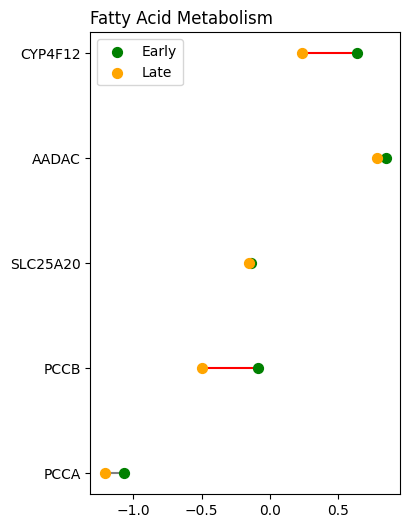

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


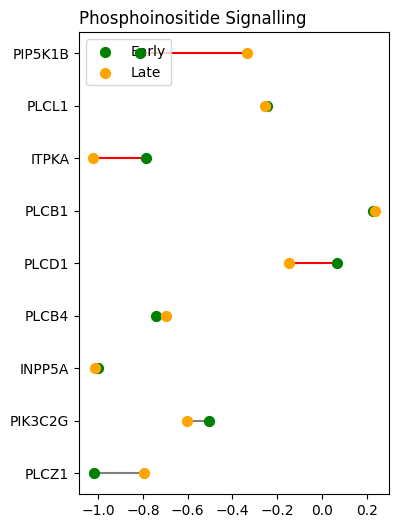

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


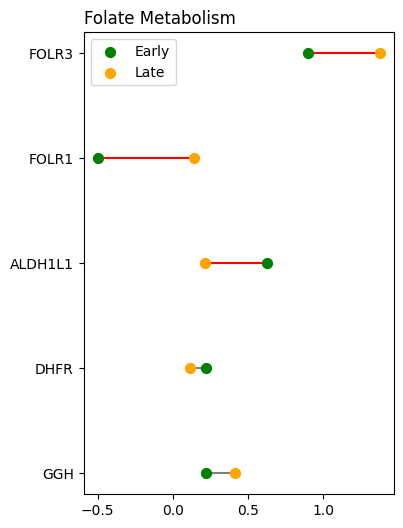

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


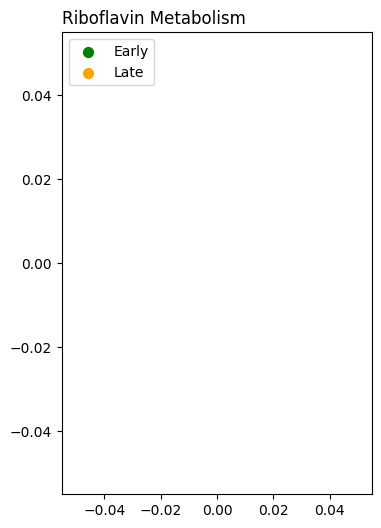

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


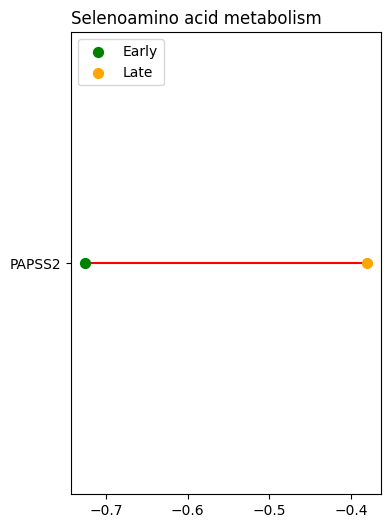

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


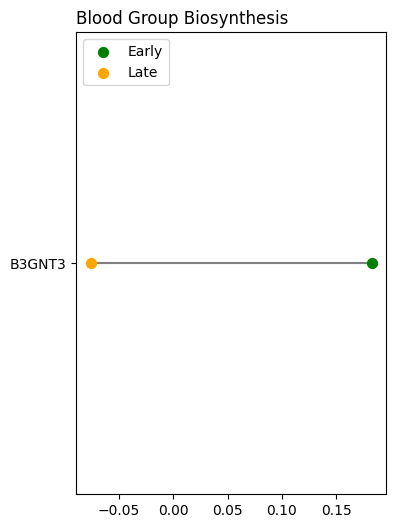

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


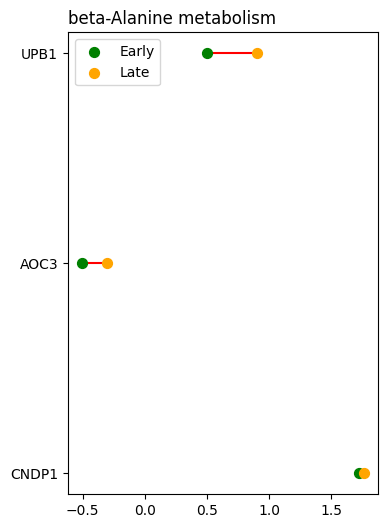

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/2650841924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)


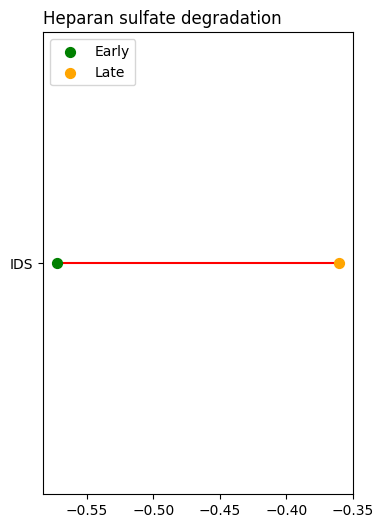

In [9]:
plt.rcParams["figure.figsize"] = (4, 6)

import matplotlib.pyplot as plt

for k in pathway_dict.keys():
    path_df = df[df.id.isin(pathway_dict[k])]

    path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
    path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)
    x3 = path_df['id'].values
    y3_new = path_df['Integrated mean (Late)'].values
    y2_new = path_df['Integrated mean (Early)'].values
    line_colours = ['red' if p < 0.05 else 'grey' for p in path_df['Integrated pval (Late-Early)'].values]


    plt.figure()
    plt.hlines(y=x3, xmin = y3_new , xmax = y2_new, color=line_colours)
    plt.scatter(y2_new, x3, color='green', s=50, label='Early', zorder=10)
    plt.scatter(y3_new, x3, color='orange', s=50 , label='Late', zorder=10)
    plt.legend(loc="upper left")


    # # Add title and axis names
    plt.title(k, loc='left')
    plt.savefig(f'Output_Figures/Pathways/{k}.svg')
    plt.show()
    # plt.xlabel('Value of the variables')
    # plt.ylabel('Alter')

In [10]:
path_df = df[df.id.isin(pathway_dict['Methionine Metabolism'])]
path_df

id RG2_Changes_filtered  Integrated padj (Late-Early)  \
69    DNMT3B             MDE_TMDS                      0.759613   
897     GNMT            TPDS_TMDE                      0.804628   
965   SLC3A1            TPDS_TMDE                      0.166434   
1528   DNMT1                 TMDE                      0.974510   

      Integrated pval (Late-Early)  Integrated diff (Late-Early)  \
69                        0.572415                      0.059802   
897                       0.747309                      0.007658   
965                       0.108943                     -0.219243   
1528                      0.974510                      0.066482   

      mannwhitneyu stat (Late-Early)  Integrated mean (Early)  \
69                            4040.0                 0.083102   
897                           4131.0                 1.492589   
965                           4855.0                 0.746769   
1528                          4240.0                 0.359377   

      Integrated mean (Late)  Protein-LogFC mean (Late-Early)  \
69                  0.142904                         0.000000   
897                 1.500246                         0.000000   
965                 0.527526                         0.000000   
1528                0.425858                        -0.021435   

      RNA-LogFC mean (Late-Early)  CpG-LogFC mean (Late-Early)  entrezgene_id  \
69                       0.019594                    -0.031471         1789.0   
897                      0.020502                    -0.022558        27232.0   
965                      0.082870                    -0.154301         6519.0   
1528                     0.121508                     0.033127         1786.0   

      logFC_rna      padj_rna  beta_diff     adj.P.Val  logFC_protein  \
69     1.311982  1.656713e-61  -0.164215  6.520902e-29       0.000000   
897   -1.168812  3.085954e-28   0.042485  2.341655e-10       0.000000   
965   -1.124188  7.812266e-44  -0.169703  1.715017e-06       0.000000   
1528   0.570657  5.699790e-62  -0.117107  8.274212e-11       0.522027   

       padj_protein  
69     0.000000e+00  
897    0.000000e+00  
965    0.000000e+00  
1528  1.281803e-102

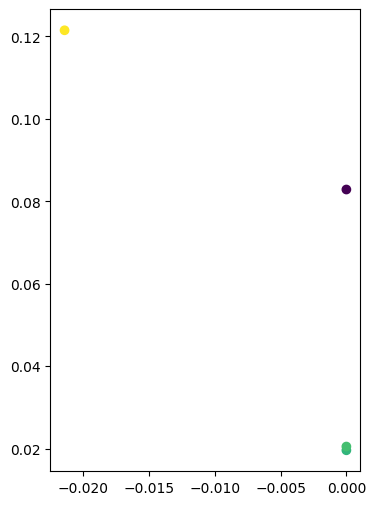

In [11]:
plt.scatter(path_df['Protein-LogFC mean (Late-Early)'], path_df['RNA-LogFC mean (Late-Early)'], c=path_df['CpG-LogFC mean (Late-Early)'].values)

In [12]:
path_df

id RG2_Changes_filtered  Integrated padj (Late-Early)  \
69    DNMT3B             MDE_TMDS                      0.759613   
897     GNMT            TPDS_TMDE                      0.804628   
965   SLC3A1            TPDS_TMDE                      0.166434   
1528   DNMT1                 TMDE                      0.974510   

      Integrated pval (Late-Early)  Integrated diff (Late-Early)  \
69                        0.572415                      0.059802   
897                       0.747309                      0.007658   
965                       0.108943                     -0.219243   
1528                      0.974510                      0.066482   

      mannwhitneyu stat (Late-Early)  Integrated mean (Early)  \
69                            4040.0                 0.083102   
897                           4131.0                 1.492589   
965                           4855.0                 0.746769   
1528                          4240.0                 0.359377   

      Integrated mean (Late)  Protein-LogFC mean (Late-Early)  \
69                  0.142904                         0.000000   
897                 1.500246                         0.000000   
965                 0.527526                         0.000000   
1528                0.425858                        -0.021435   

      RNA-LogFC mean (Late-Early)  CpG-LogFC mean (Late-Early)  entrezgene_id  \
69                       0.019594                    -0.031471         1789.0   
897                      0.020502                    -0.022558        27232.0   
965                      0.082870                    -0.154301         6519.0   
1528                     0.121508                     0.033127         1786.0   

      logFC_rna      padj_rna  beta_diff     adj.P.Val  logFC_protein  \
69     1.311982  1.656713e-61  -0.164215  6.520902e-29       0.000000   
897   -1.168812  3.085954e-28   0.042485  2.341655e-10       0.000000   
965   -1.124188  7.812266e-44  -0.169703  1.715017e-06       0.000000   
1528   0.570657  5.699790e-62  -0.117107  8.274212e-11       0.522027   

       padj_protein  
69     0.000000e+00  
897    0.000000e+00  
965    0.000000e+00  
1528  1.281803e-102

## Make the boxplots 

In [13]:
# Now we can iterate through each one and do whatever we need to do
plt.rcParams["figure.figsize"] = (12, 3)
plt.rcParams['svg.fonttype'] = 'none' 
import os
from sciviso import Boxplot

fig_size = (12, 3)
vis_opts = {"figsize": fig_size, "title_font_size": 12, "axis_font_size": 10, 
           'palette': ['lightgrey', 'dimgrey']}

def plot_gene_logfcs(gene_name, cond0, cond1, x="Stage", cmap="Purples"):
    fig, ax = plt.subplots(nrows=1, ncols=5)
    #gene_name = ens_to_gene.get(gene)
    box_data_df = dfs['Integrated']
    #try:
    gene = gene_name
    box_data_df = box_data_df[box_data_df[x].isin([cond0, cond1])]
    gene_data = box_data_df[box_data_df['GeneId'] == gene]
    b = Boxplot(gene_data, x=x, y="values",  add_dots=True, 
            add_stats=True, title=f'Integrated diff.',
            xlabel="Sample", ylabel=f'diff. {cond1}-{cond0}', config=vis_opts)
    b.plot(ax=ax[0], legend=False)
    #nt('Integrated')
    
    box_data_df = dfs['Protein-LogFC']
    try:
        box_data_df = box_data_df[box_data_df[x].isin([cond0, cond1])]
        gene_data = box_data_df[box_data_df['GeneId'] == gene]
        b = Boxplot(gene_data, x=x, y="values", add_dots=True, 
                add_stats=True, title=f'Protein logFC',
                xlabel="Sample", ylabel=f"Protein  {cond1}-{cond0}", config=vis_opts)
        b.plot(ax=ax[1])
    except:
        print('Protein logFC')
        
    box_data_df = dfs['Protein-Tumor']
    try:
        box_data_df = box_data_df[box_data_df[x].isin([cond0, cond1])]
        gene_data = box_data_df[box_data_df['GeneId'] == gene]
        b = Boxplot(gene_data, x=x, y="values", add_dots=True, 
                add_stats=True, title=f'Protein Tumor',
                xlabel="Sample", ylabel=f"Protein  {cond1}-{cond0}", config=vis_opts)
        b.plot(ax=ax[2])
    except:
        print('Protein')
        
    box_data_df = dfs['RNA-LogFC']
    try:
        box_data_df = box_data_df[box_data_df[x].isin([cond0, cond1])]
        gene_data = box_data_df[box_data_df['GeneId'] == gene]
        b = Boxplot(gene_data, x=x, y="values", add_dots=True, 
                add_stats=True, title=f'RNA logFC',
                xlabel="Sample", ylabel=f"RNA {cond1}-{cond0}", config=vis_opts)
        b.plot(ax=ax[3])
    except:
        print('RNA')
    box_data_df = dfs['Protein-Normal']
    try:
        box_data_df = box_data_df[box_data_df[x].isin([cond0, cond1])]
        gene_data = box_data_df[box_data_df['GeneId'] == gene]
        
        b = Boxplot(gene_data, x=x, y="values", add_dots=True, 
                add_stats=True, title=f'Protein Normal',
                xlabel="Sample", ylabel=f"Protein {cond1}-{cond0}", config=vis_opts)
        b.plot(ax=ax[4])
    except:
        print('CpG')
    # ALso print the URL so that I can quickly check the ones that look good in protein atlas
    print(f'https://www.proteinatlas.org/{gene}-{gene_name}/pathology/renal+cancer/KIRC')
    fig.suptitle(f'{gene_name} ({cond1}-{cond0})', fontsize=16, fontweight='bold')
    fig.tight_layout()
    fig.subplots_adjust(top=0.8)
    if save_fig:
        plt.savefig(f'{fig_dir}boxplot_{gene_name}_{cond1}-{cond0}.svg')
    plt.show()


In [14]:
# Now we can iterate through each one and do whatever we need to do
plt.rcParams["figure.figsize"] = (12, 3)
plt.rcParams['svg.fonttype'] = 'none' 
import os
from sciviso import Boxplot

fig_size = (12, 3)
vis_opts = {"figsize": fig_size, "title_font_size": 12, "axis_font_size": 10, 
           'palette': ['lightgrey', 'dimgrey']}

def plot_gene_logfcs(gene_name, cond0, cond1, x="Stage", cmap="Purples"):
    fig, ax = plt.subplots(nrows=1, ncols=5)
    #gene_name = ens_to_gene.get(gene)
    box_data_df = dfs['Integrated']
    #try:
    gene = gene_name
    box_data_df = box_data_df[box_data_df[x].isin([cond0, cond1])]
    gene_data = box_data_df[box_data_df['GeneId'] == gene]
    b = Boxplot(gene_data, x=x, y="values",  add_dots=True, 
            add_stats=True, title=f'Integrated diff.',
            xlabel="Sample", ylabel=f'diff. {cond1}-{cond0}', config=vis_opts)
    b.plot(ax=ax[0], legend=False)
    #nt('Integrated')
    
    box_data_df = dfs['Protein-Normal']
    try:
        box_data_df = box_data_df[box_data_df[x].isin([cond0, cond1])]
        gene_data = box_data_df[box_data_df['GeneId'] == gene]
        b = Boxplot(gene_data, x=x, y="values", add_dots=True, 
                add_stats=True, title=f'Protein Normal',
                xlabel="Sample", ylabel=f"Protein  {cond1}-{cond0}", config=vis_opts)
        b.plot(ax=ax[1])
    except:
        print('Protein logFC')
        
    box_data_df = dfs['Protein-Tumor']
    try:
        box_data_df = box_data_df[box_data_df[x].isin([cond0, cond1])]
        gene_data = box_data_df[box_data_df['GeneId'] == gene]
        b = Boxplot(gene_data, x=x, y="values", add_dots=True, 
                add_stats=True, title=f'Protein Tumor',
                xlabel="Sample", ylabel=f"Protein  {cond1}-{cond0}", config=vis_opts)
        b.plot(ax=ax[2])
    except:
        print('Protein')
        
    box_data_df = dfs['RNA-Normal']
    try:
        box_data_df = box_data_df[box_data_df[x].isin([cond0, cond1])]
        gene_data = box_data_df[box_data_df['GeneId'] == gene]
        b = Boxplot(gene_data, x=x, y="values", add_dots=True, 
                add_stats=True, title=f'RNA Normal',
                xlabel="Sample", ylabel=f"RNA {cond1}-{cond0}", config=vis_opts)
        b.plot(ax=ax[3])
    except:
        print('RNA')
    box_data_df = dfs['RNA-Tumor']
    try:
        box_data_df = box_data_df[box_data_df[x].isin([cond0, cond1])]
        gene_data = box_data_df[box_data_df['GeneId'] == gene]
        
        b = Boxplot(gene_data, x=x, y="values", add_dots=True, 
                add_stats=True, title=f'RNA Tumor',
                xlabel="Sample", ylabel=f"RNA {cond1}-{cond0}", config=vis_opts)
        b.plot(ax=ax[4])
    except:
        print('CpG')
    # ALso print the URL so that I can quickly check the ones that look good in protein atlas
    print(f'https://www.proteinatlas.org/{gene}-{gene_name}/pathology/renal+cancer/KIRC')
    fig.suptitle(f'{gene_name} ({cond1}-{cond0})', fontsize=16, fontweight='bold')
    fig.tight_layout()
    fig.subplots_adjust(top=0.8)
    if save_fig:
        plt.savefig(f'{fig_dir}boxplot_{gene_name}_{cond1}-{cond0}.svg')
    plt.show()


In [15]:
dfs = {}
files = os.listdir('Output_Data')
for f in files:
    if 'csv' in f and 'Boxplot_data_' in f:
        d = f.replace('.csv', '').replace('Boxplot_data_', '')
        dfs[d] = pd.read_csv(f'Output_Data/{f}')

In [16]:
df[df['id'] == 'TRIP13']

id RG2_Changes_filtered  Integrated padj (Late-Early)  \
2668  TRIP13                  MDE                      0.716941   

      Integrated pval (Late-Early)  Integrated diff (Late-Early)  \
2668                      0.460772                     -0.085201   

      mannwhitneyu stat (Late-Early)  Integrated mean (Early)  \
2668                          4530.0                 0.631976   

      Integrated mean (Late)  Protein-LogFC mean (Late-Early)  \
2668                0.546775                        -0.092878   

      RNA-LogFC mean (Late-Early)  CpG-LogFC mean (Late-Early)  entrezgene_id  \
2668                    -0.176357                    -0.037016         9319.0   

      logFC_rna       padj_rna  beta_diff     adj.P.Val  logFC_protein  \
2668   2.408343  3.291025e-216  -0.279962  8.886760e-40       0.881535   

      padj_protein  
2668  2.567370e-70

FLT1
HIF1A


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Stage I v.s. Stage IV: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.612e-02 U_stat=4.050e+02


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 90.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 65.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Stage I v.s. Stage IV: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.235e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 90.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 65.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:161: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is depr

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Stage I v.s. Stage IV: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.235e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 73.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:161: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is depr

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Stage I v.s. Stage IV: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.565e-03 U_stat=4.140e+02


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 73.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 28.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Stage I v.s. Stage IV: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.921e-01 U_stat=6.820e+02


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 73.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

https://www.proteinatlas.org/SLC3A1-SLC3A1/pathology/renal+cancer/KIRC


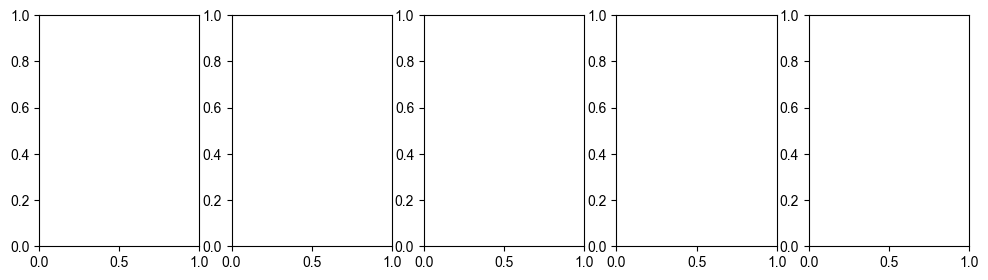

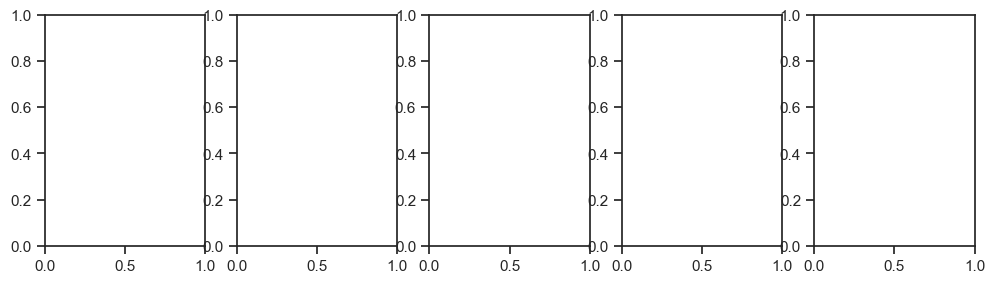

/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 45.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 47.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

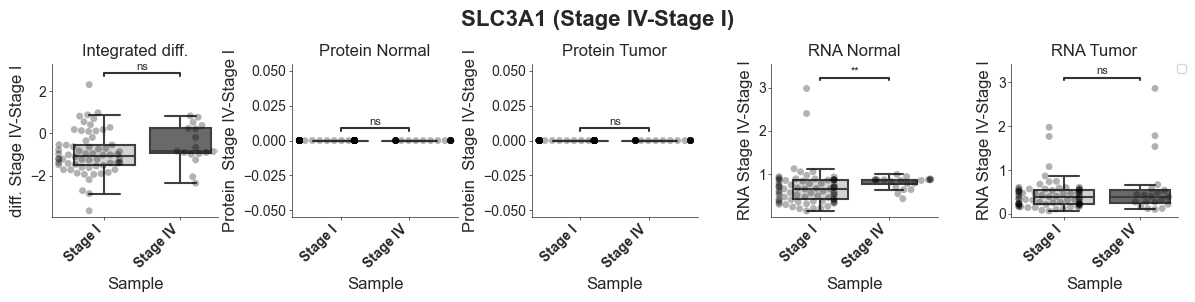

/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.089e-01 U_stat=3.650e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 34.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=9.785e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 95.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 90.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=9.785e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 96.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.661e-01 U_stat=5.078e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 96.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 58.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 43.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.833e-01 U_stat=5.336e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 96.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

https://www.proteinatlas.org/SLC3A1-SLC3A1/pathology/renal+cancer/KIRC


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 63.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 51.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 63.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 37.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

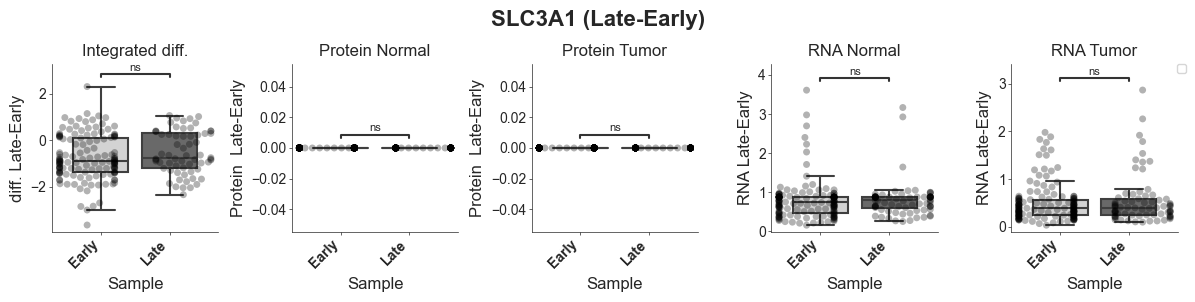

BHMT


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Stage I v.s. Stage IV: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.770e-01 U_stat=4.550e+02


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 16.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Stage I v.s. Stage IV: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.081e-02 U_stat=9.250e+02


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:161: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/ca

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Stage I v.s. Stage IV: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.421e-01 U_stat=1.247e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:161: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/cat

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Stage I v.s. Stage IV: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.910e-05 U_stat=2.810e+02


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:161: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 16.8% of the points cannot be placed; you may want to decrease the

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Stage I v.s. Stage IV: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.668e-01 U_stat=7.280e+02


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:161: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_27008/4132009676.py:71: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


https://www.proteinatlas.org/TRIP13-TRIP13/pathology/renal+cancer/KIRC


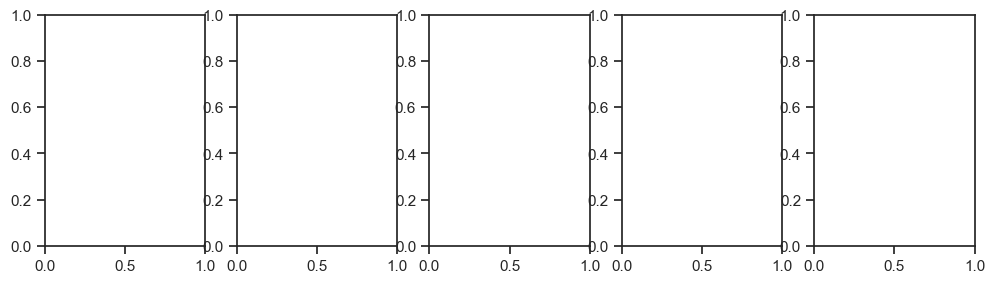

/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 25.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 16.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


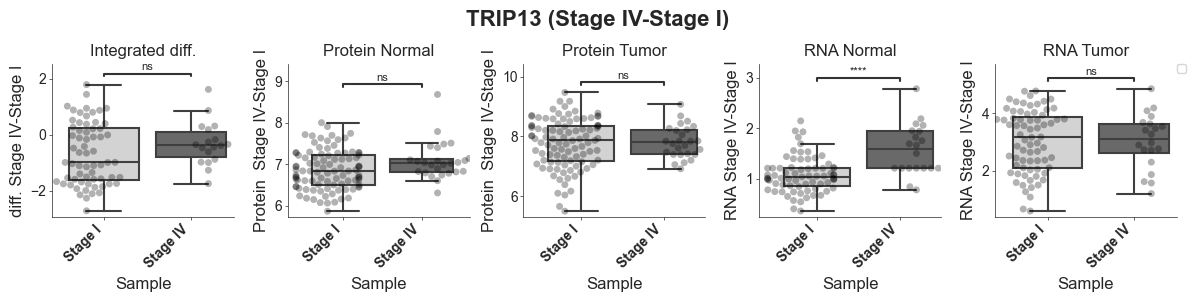

/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.608e-01 U_stat=3.975e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.454e-02 U_stat=8.533e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 45.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 25.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:161: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is depr

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.369e-01 U_stat=9.640e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 49.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 29.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 43.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.476e-04 U_stat=3.812e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 49.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 29.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 46.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.259e-01 U_stat=5.444e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 48.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 28.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 45.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

https://www.proteinatlas.org/TRIP13-TRIP13/pathology/renal+cancer/KIRC


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 54.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 33.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 50.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 51.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

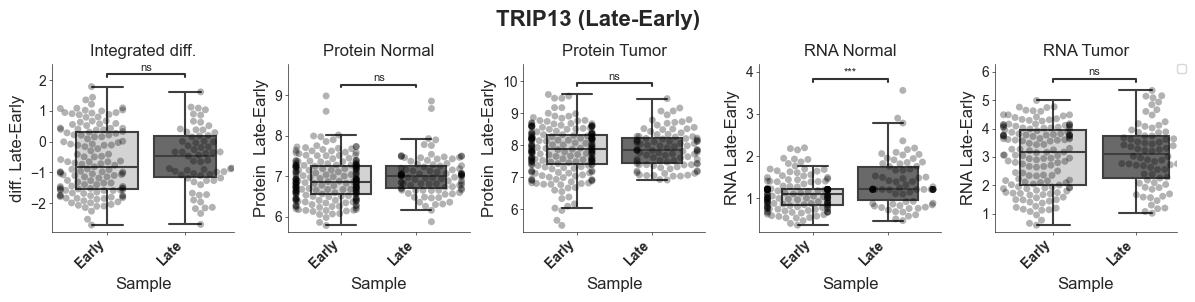

In [17]:
save_fig = False
for gene_name in ['FLT1', 'HIF1A', 'SLC3A1', 'BHMT', 'TRIP13', ]:
    # Do the same for old and young
    # And stage
    try:
        plot_gene_logfcs(gene_name, 'Stage I', 'Stage IV',  x='Tumor Stage')
        plot_gene_logfcs(gene_name, 'Early', 'Late',  x='Stage')
    except:
        print(gene_name)

AHCY
SUOX
FAH


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Stage I v.s. Stage IV: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.909e-01 U_stat=6.120e+02


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 14.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 90.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 65.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Stage I v.s. Stage IV: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.235e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 90.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 65.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:161: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is depr

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Stage I v.s. Stage IV: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.235e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 73.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:161: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is depr

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Stage I v.s. Stage IV: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.001e-01 U_stat=8.440e+02


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 73.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Stage I v.s. Stage IV: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.725e-01 U_stat=8.250e+02


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 73.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 62.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

https://www.proteinatlas.org/GNMT-GNMT/pathology/renal+cancer/KIRC


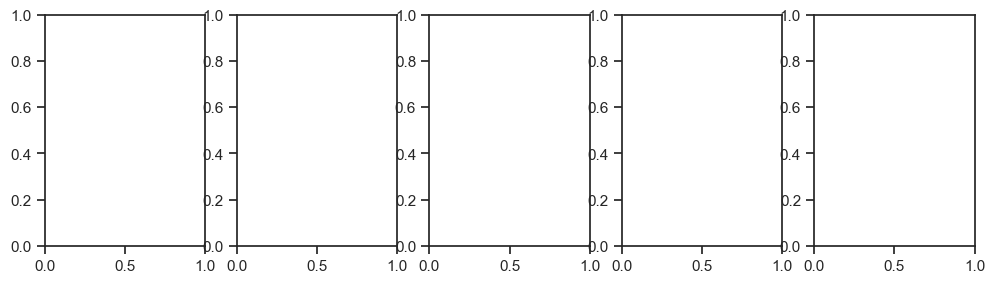

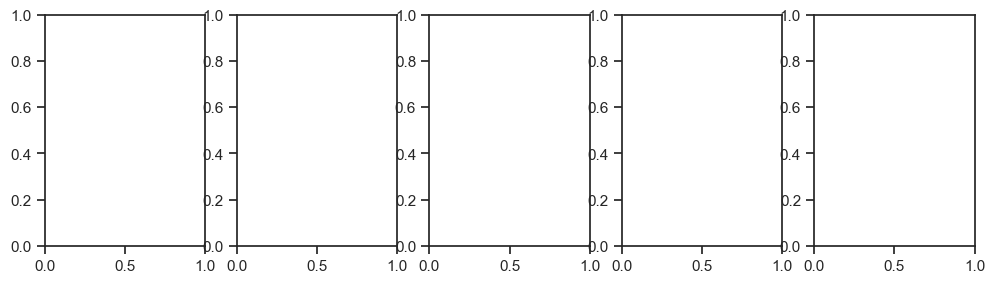

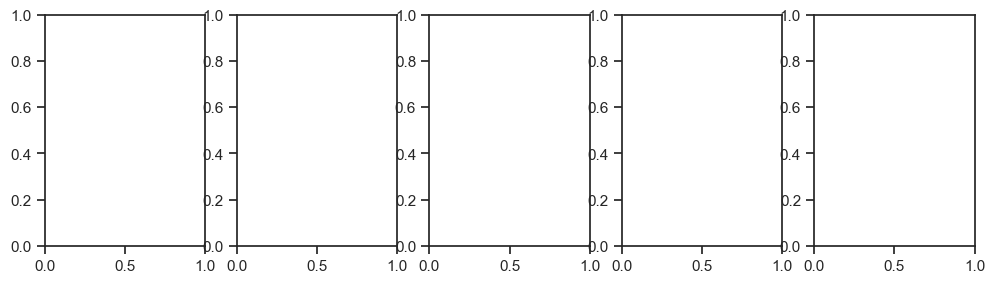

/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 69.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 54.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


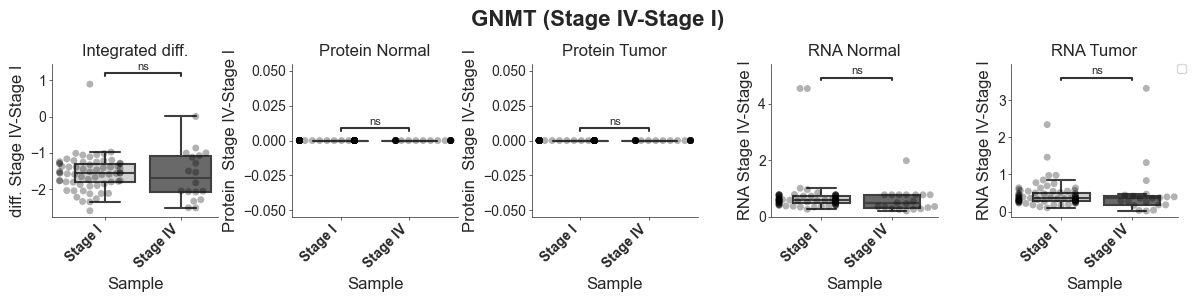

/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 27.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.473e-01 U_stat=4.374e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 39.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 42.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 95.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=9.785e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 42.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 95.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 90.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciv

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=9.785e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 43.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 96.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.782e-01 U_stat=5.884e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 96.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 69.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.765e-01 U_stat=5.797e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 96.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

https://www.proteinatlas.org/GNMT-GNMT/pathology/renal+cancer/KIRC


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 59.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 71.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 58.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

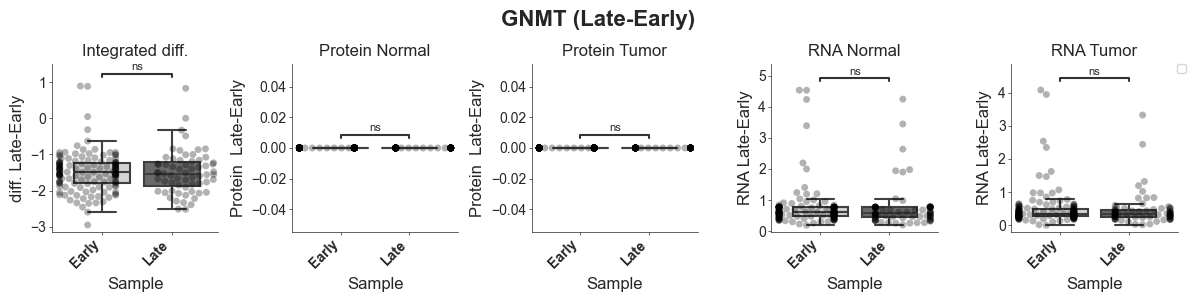

In [18]:
save_fig = False
for gene_name in ['AHCY', 'SUOX', 'FAH', 'GNMT']:
    # Do the same for old and young
    # And stage
    try:
        plot_gene_logfcs(gene_name, 'Stage I', 'Stage IV',  x='Tumor Stage')
        plot_gene_logfcs(gene_name, 'Early', 'Late',  x='Stage')
    except:
        print(gene_name)

AHCY
AHCYL1
AHCYL2
ACY1
AMD1


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 27.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.473e-01 U_stat=4.374e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 39.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 42.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 95.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=9.785e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 42.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 95.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 90.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciv

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=9.785e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 43.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 96.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.782e-01 U_stat=5.884e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 96.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 69.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.765e-01 U_stat=5.797e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 96.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

https://www.proteinatlas.org/GNMT-GNMT/pathology/renal+cancer/KIRC


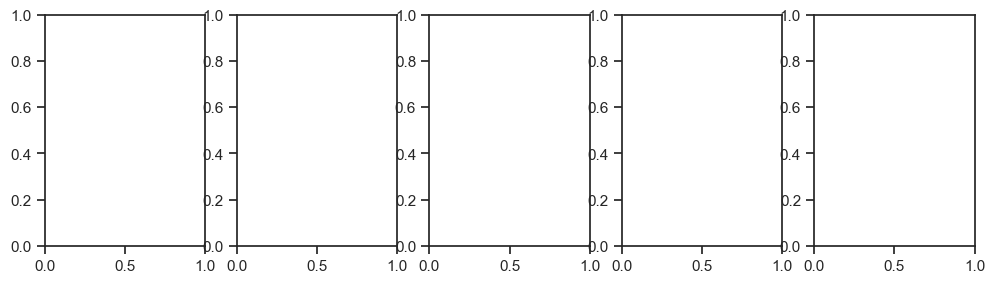

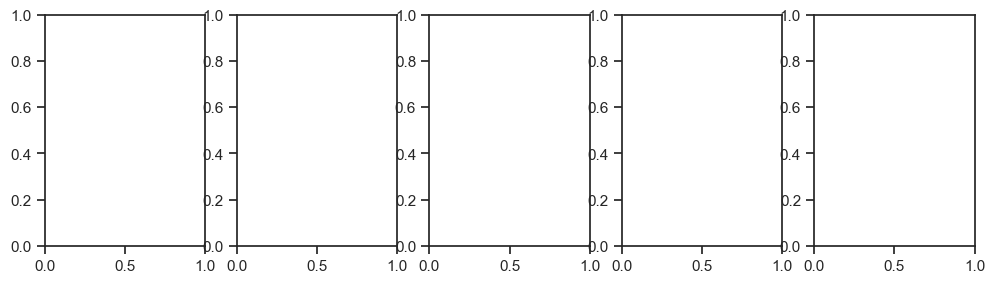

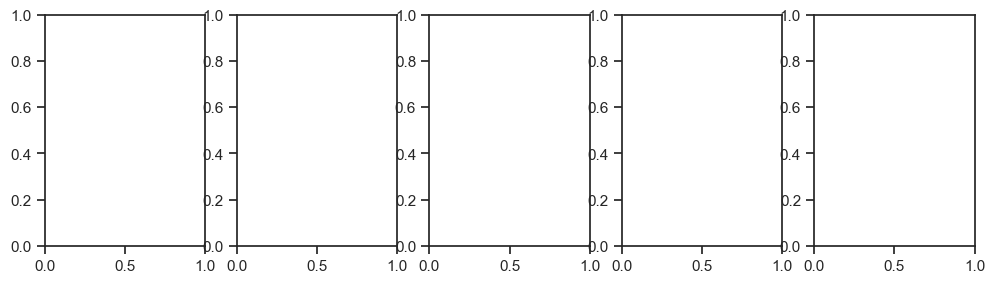

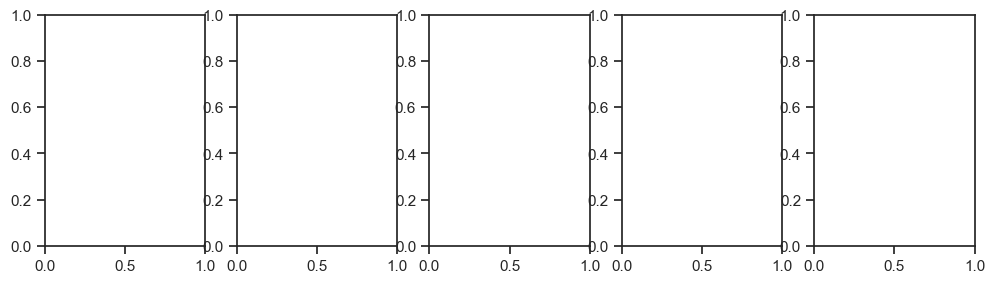

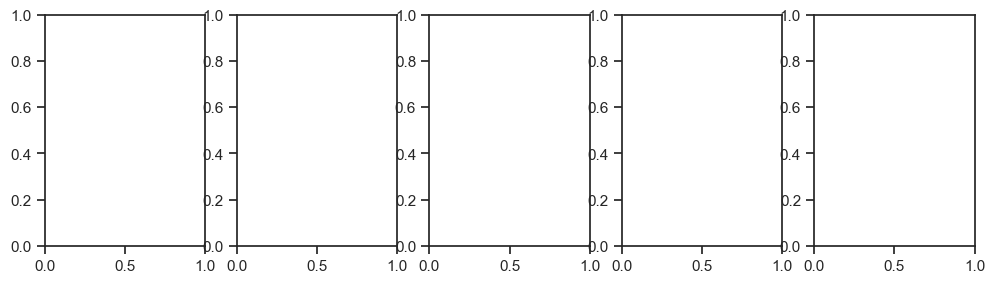

/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 49.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 59.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn

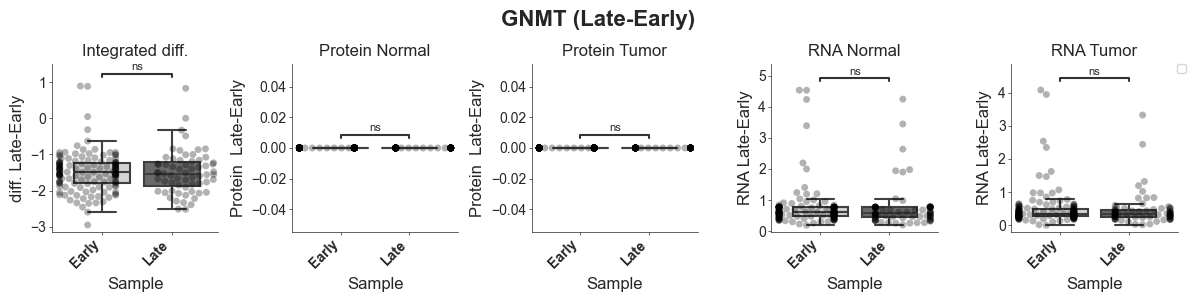

/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.745e-01 U_stat=4.265e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 16.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 37.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.828e-01 U_stat=9.591e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 47.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:161: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is depr

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.722e-01 U_stat=9.760e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 52.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.095e-02 U_stat=6.534e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 52.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 40.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.651e-01 U_stat=5.422e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 52.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 40.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

https://www.proteinatlas.org/DNMT1-DNMT1/pathology/renal+cancer/KIRC


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 56.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 47.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 23.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

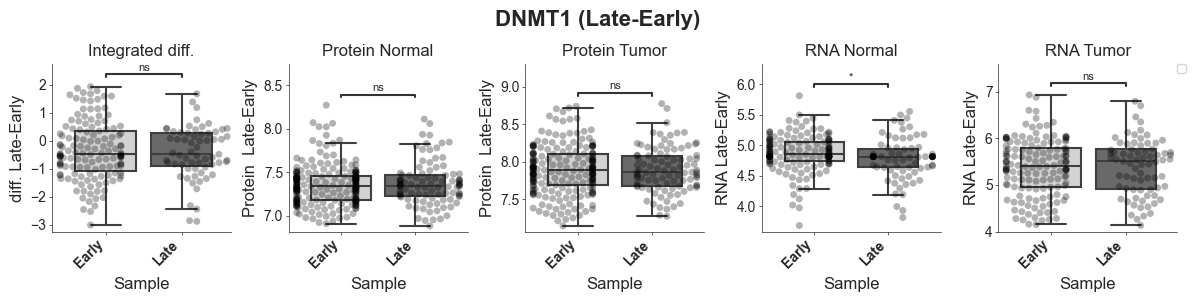

DNMT3A


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.724e-01 U_stat=4.465e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 25.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=9.785e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 95.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 90.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=9.785e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 30.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 96.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.267e-03 U_stat=4.044e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 96.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 65.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 39.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.330e-01 U_stat=5.364e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 30.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 96.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn

https://www.proteinatlas.org/DNMT3B-DNMT3B/pathology/renal+cancer/KIRC


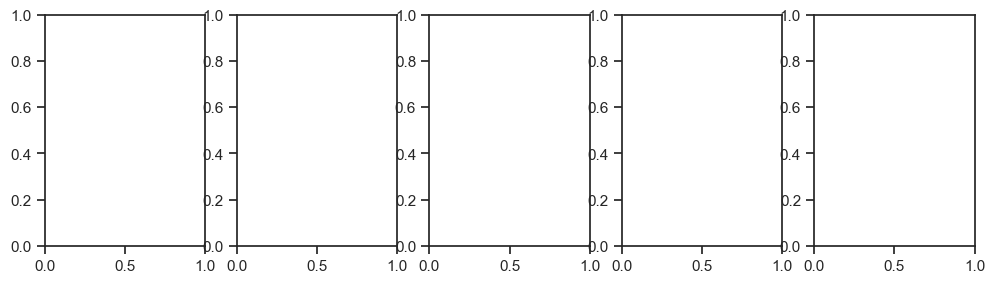

/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 34.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 69.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 44.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn

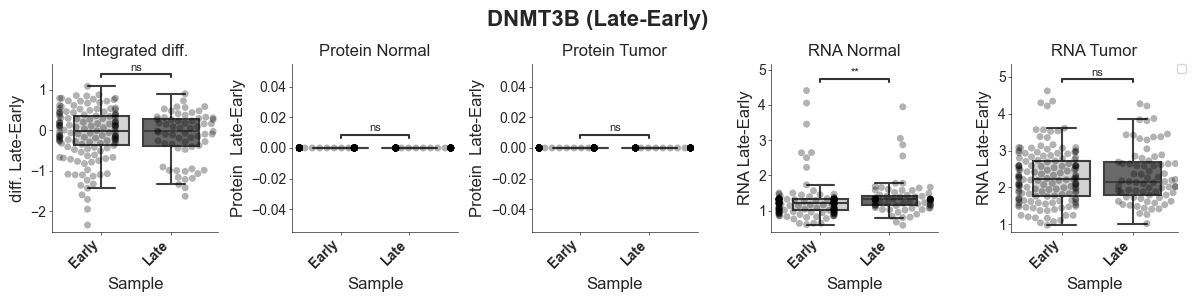

DNMT3L
BHMT
BHMT2
MAT1A
MAT2A
MAT2B
MTAP
MTR
SLC25A26


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.089e-01 U_stat=3.650e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 34.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=9.785e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 95.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 90.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=9.785e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 96.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.661e-01 U_stat=5.078e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 96.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 58.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 43.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.833e-01 U_stat=5.336e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 96.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

https://www.proteinatlas.org/SLC3A1-SLC3A1/pathology/renal+cancer/KIRC


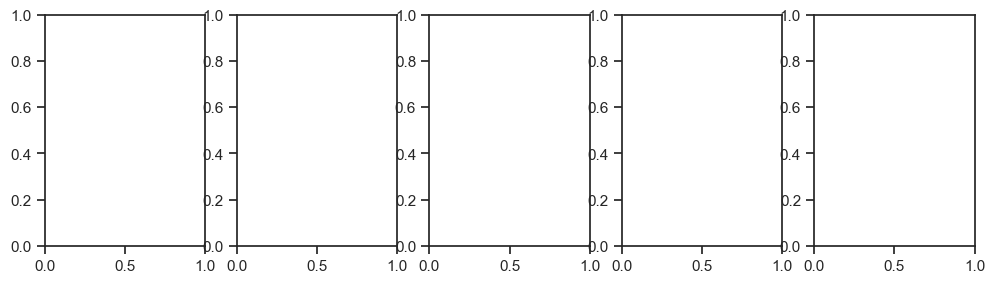

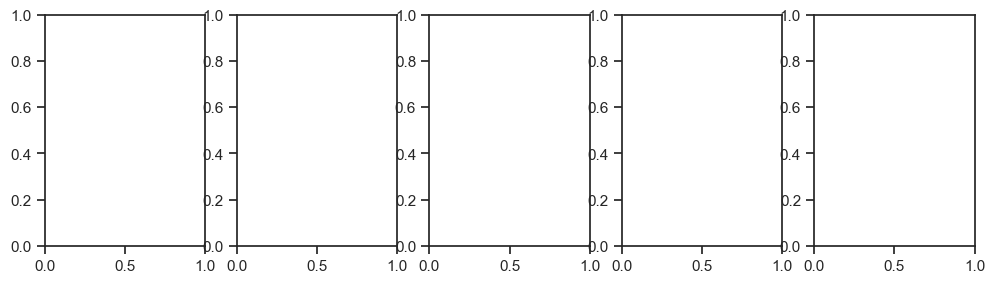

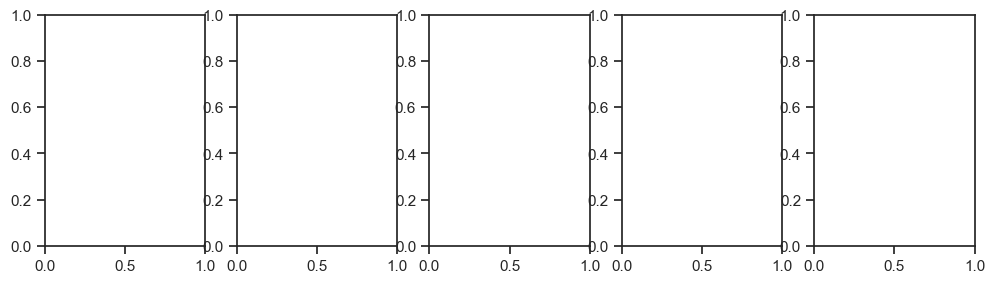

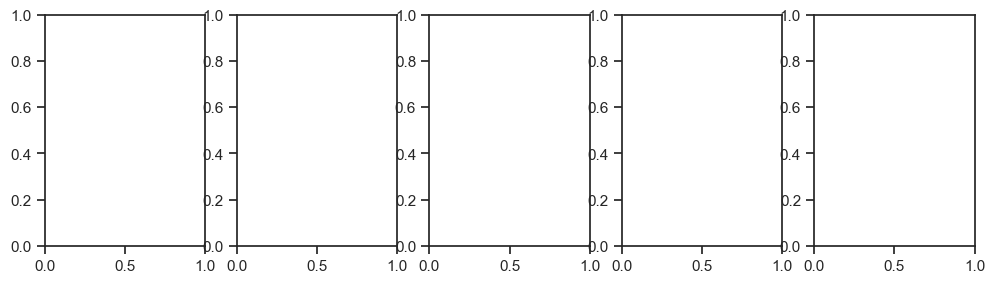

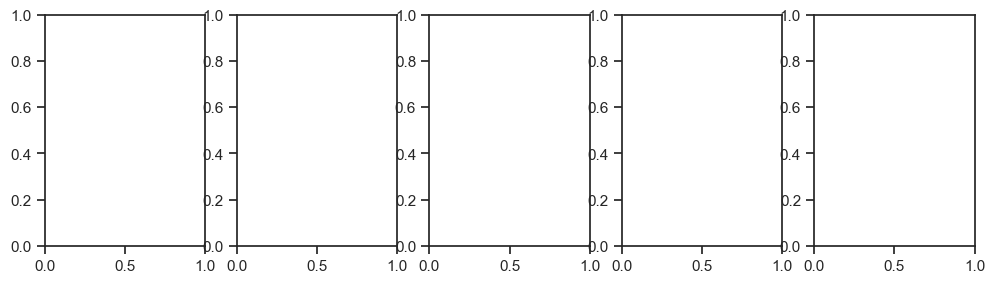

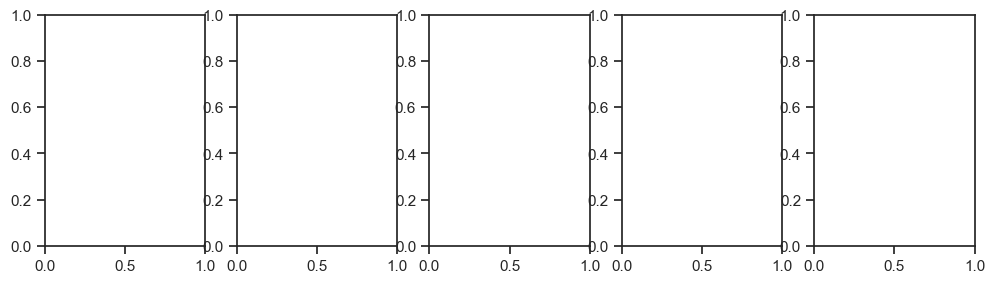

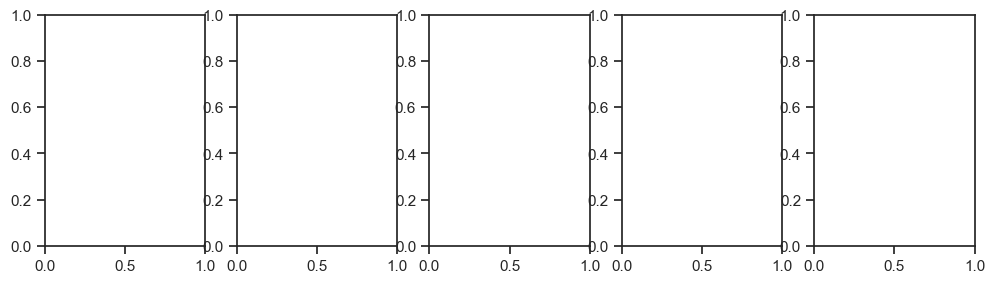

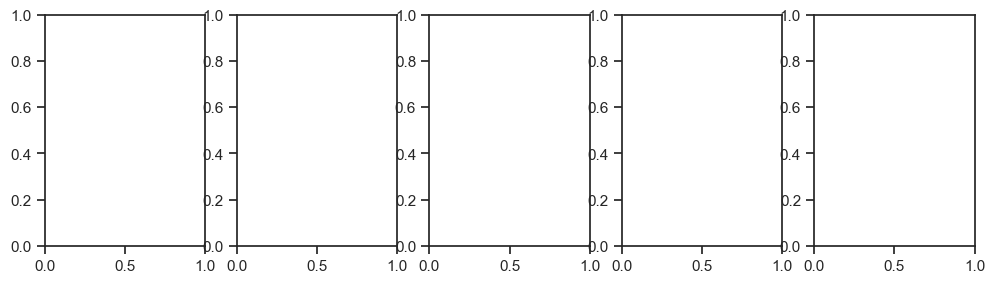

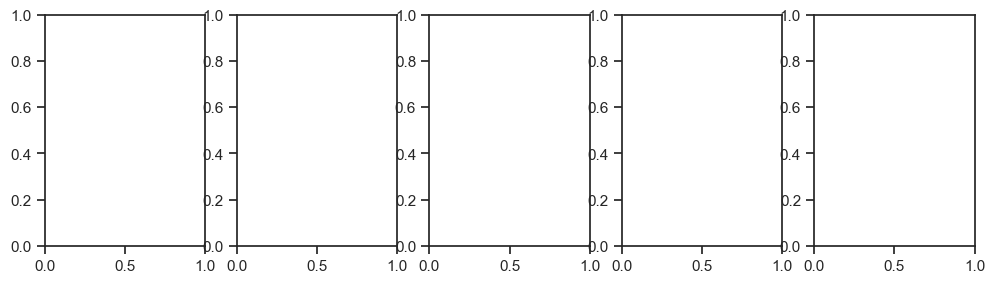

/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 42.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 63.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 51.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

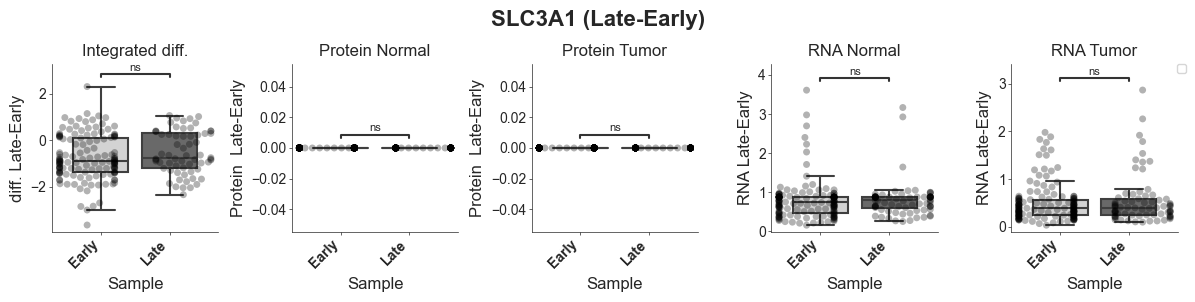

SLC43A2
SLC6A14
SLC7A8
SUOX


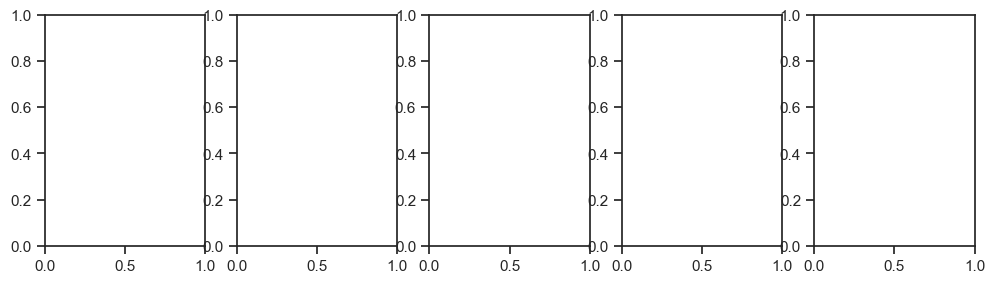

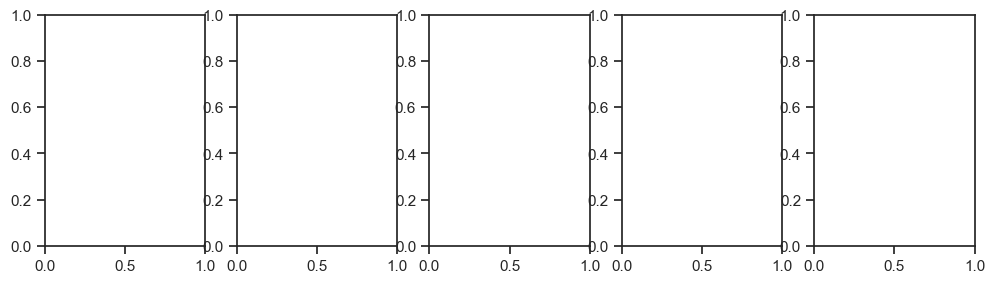

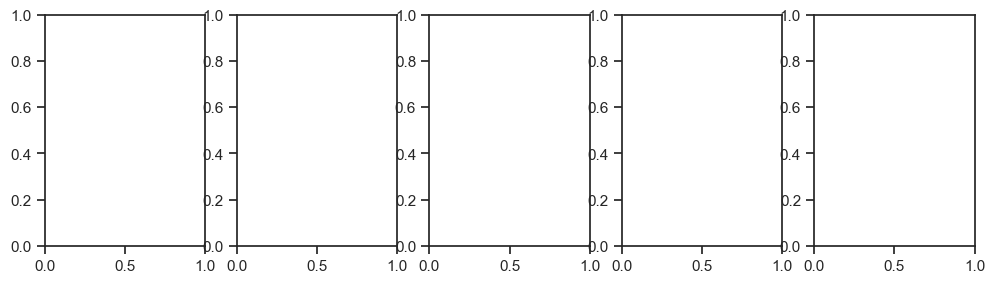

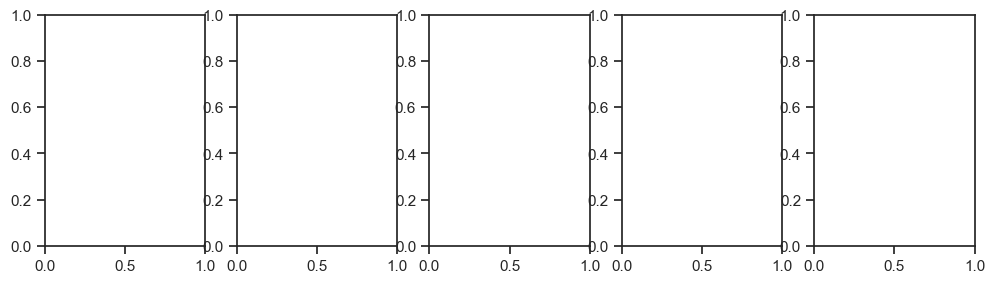

In [19]:

save_fig = False
for gene_name in pathway_dict['Methionine Metabolism']:
    # Do the same for old and young
    # And stage
    try:
        #plot_gene_logfcs(gene_name, 'Stage I', 'Stage IV',  x='Tumor Stage')
        plot_gene_logfcs(gene_name, 'Early', 'Late',  x='Stage')
    except:
        print(gene_name)

/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.073e-01 U_stat=4.394e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 14.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 46.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.358e-01 U_stat=1.046e+04


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 55.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:161: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is depr

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.884e-02 U_stat=8.402e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 29.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 38.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.184e-03 U_stat=6.620e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 29.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 42.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.164e-01 U_stat=5.765e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 29.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 42.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

https://www.proteinatlas.org/P4HA1-P4HA1/pathology/renal+cancer/KIRC


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 63.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 33.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

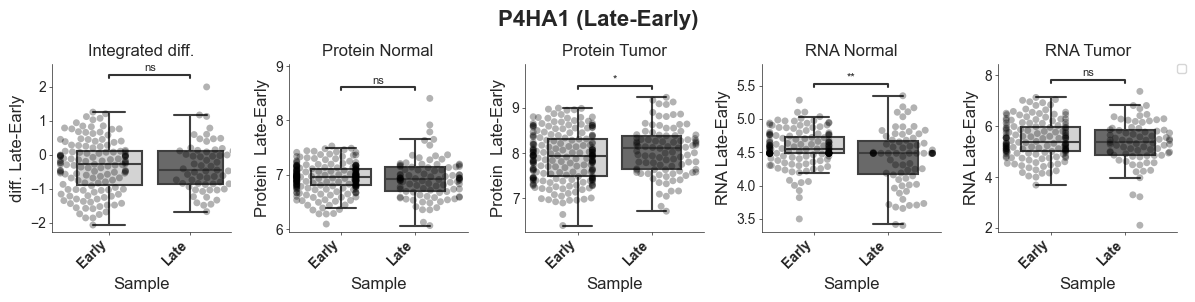

/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 14.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.766e-02 U_stat=5.080e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 23.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 25.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 45.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.666e-03 U_stat=1.199e+04


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 56.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:161: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is depr

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.569e-01 U_stat=8.791e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 25.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 59.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 25.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 39.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.945e-05 U_stat=7.132e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 59.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 25.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.931e-01 U_stat=4.821e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 25.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 59.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 25.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

https://www.proteinatlas.org/P4HA2-P4HA2/pathology/renal+cancer/KIRC


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 63.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 30.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 48.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 23.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

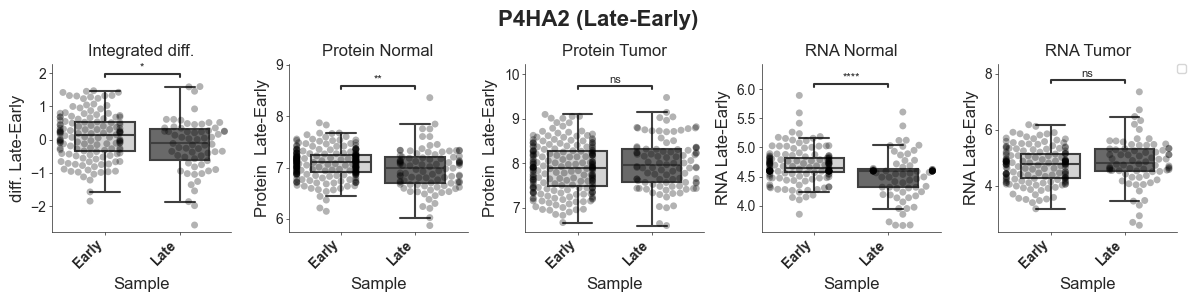

P4HB
GGPS1
HMGCR
SLC25A1
SLC33A1
MTMR3


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.738e-01 U_stat=4.522e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 29.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 31.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.078e-02 U_stat=1.158e+04


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 43.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:161: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 31.1% of the points cannot be placed; you may want to decrease the

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.235e-03 U_stat=7.865e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 31.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 36.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.912e-01 U_stat=5.984e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 42.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 14.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.290e-01 U_stat=5.618e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 31.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 42.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn

https://www.proteinatlas.org/PLOD1-PLOD1/pathology/renal+cancer/KIRC


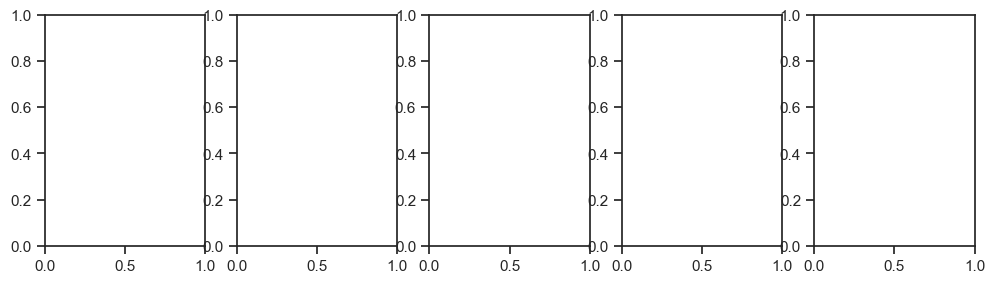

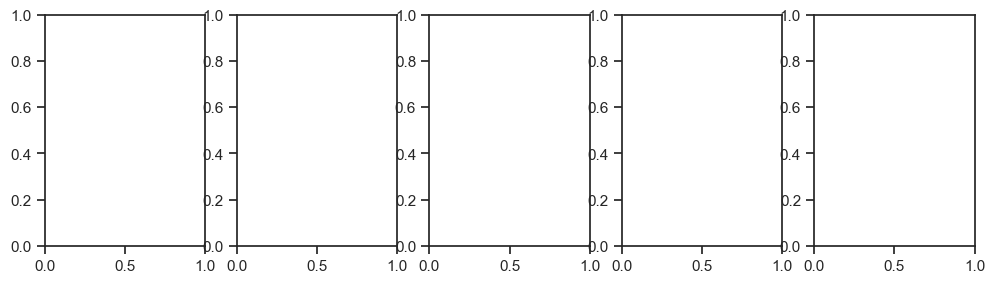

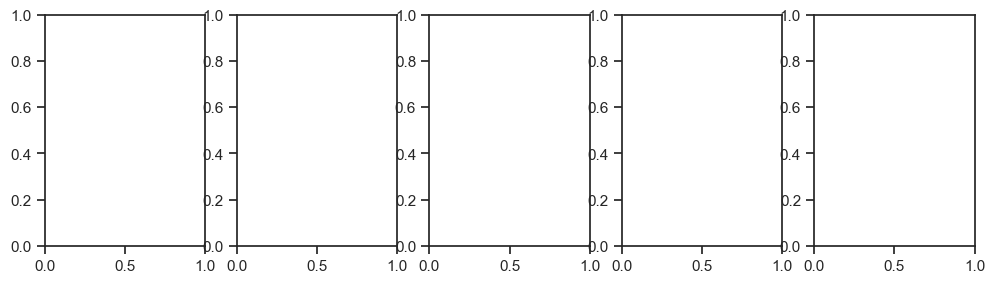

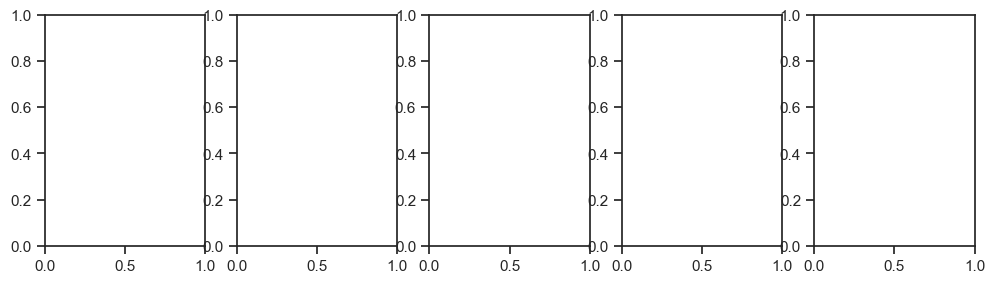

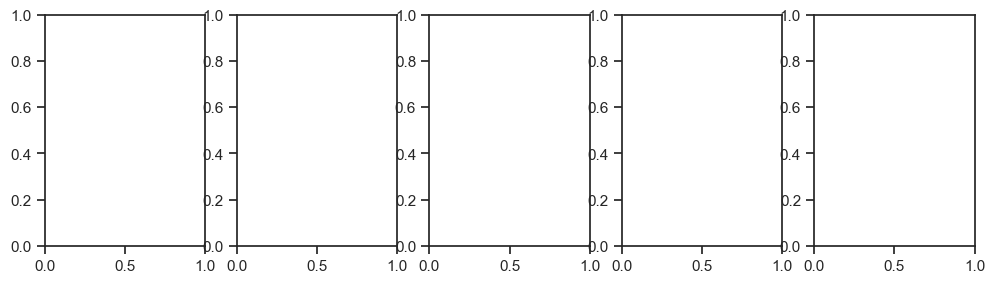

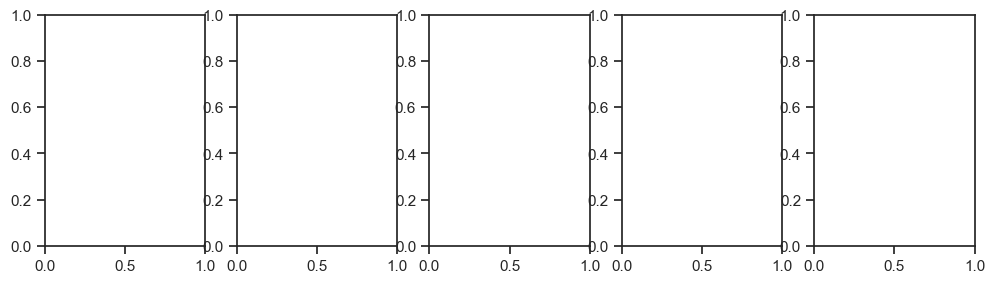

/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 34.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 52.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(

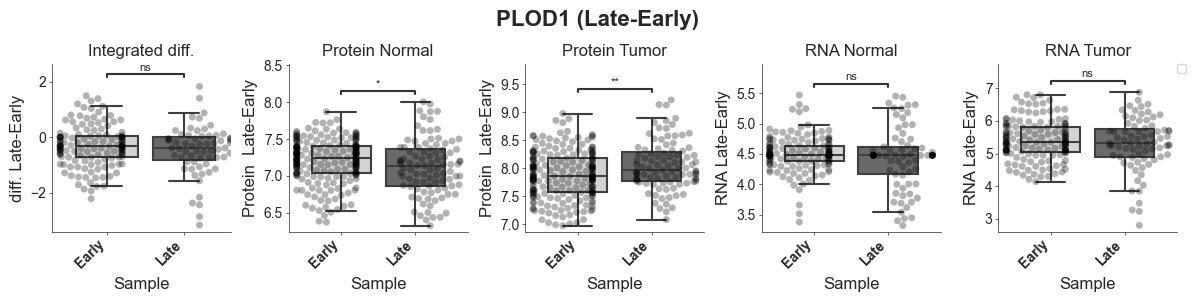

/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.292e-01 U_stat=4.122e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 19.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 37.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.065e-01 U_stat=9.423e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:161: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is depr

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.126e-02 U_stat=8.561e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 19.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 52.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 35.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.527e-02 U_stat=4.550e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 52.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.502e-01 U_stat=5.135e+03


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 52.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

https://www.proteinatlas.org/PLOD2-PLOD2/pathology/renal+cancer/KIRC


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 57.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 27.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 44.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

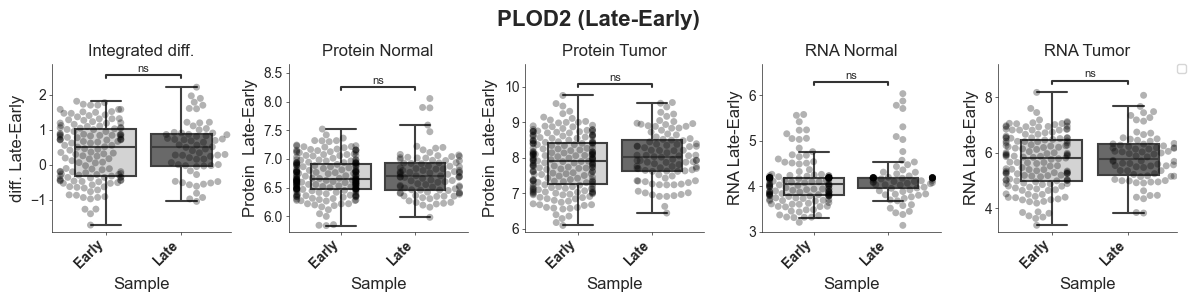

PLOD3


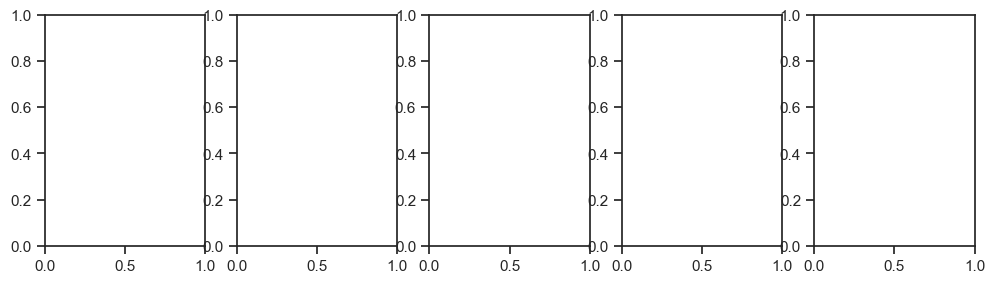

In [20]:

save_fig = False
for gene_name in pathway_dict['Protein Modification']:
    # Do the same for old and young
    # And stage
    try:
        #plot_gene_logfcs(gene_name, 'Stage I', 'Stage IV',  x='Tumor Stage')
        plot_gene_logfcs(gene_name, 'Early', 'Late',  x='Stage')
    except:
        print(gene_name)

In [23]:
pathway = pd.read_csv('Required_Refs/GSEA/c2.cp.kegg.v6.2.symbols.csv')

pathway_dict = {}
for p in set(pathway.term.values):
    pathway_dict[p] = list(pathway[pathway.term == p].gene.values)
pathway_dict

{'KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY': ['STAT3',
  'CHUK',
  'PTPN11',
  'PPARGC1A',
  'NPY',
  'TNF',
  'SLC2A4',
  'CD36',
  'SLC2A1',
  'MTOR',
  'ADIPOR2',
  'PRKAG2',
  'ACSL6',
  'POMC',
  'MAPK9',
  'MAPK10',
  'PRKCQ',
  'RXRB',
  'RXRG',
  'IKBKB',
  'PRKAG3',
  'RXRA',
  'TNFRSF1B',
  'ADIPOR1',
  'AKT1',
  'AKT2',
  'TNFRSF1A',
  'JAK2',
  'LEPR',
  'AKT3',
  'CPT1B',
  'LEP',
  'ACACB',
  'NFKB1',
  'NFKBIB',
  'NFKBIA',
  'NFKBIE',
  'IKBKG',
  'MAPK8',
  'CPT1A',
  'PCK2',
  'CPT1C',
  'PCK1',
  'RELA',
  'STK11',
  'PPARA',
  'TRAF2',
  'PRKAB2',
  'PRKAB1',
  'PRKAA2',
  'PRKAA1',
  'SOCS3',
  'TRADD',
  'ACSL5',
  'ADIPOQ',
  'G6PC2',
  'IRS2',
  'ACSL1',
  'AGRP',
  'PRKAG1',
  'G6PC',
  'IRS1',
  'CAMKK1',
  'CAMKK2',
  'IRS4',
  'ACSL3',
  'ACSL4'],
 'KEGG_CALCIUM_SIGNALING_PATHWAY': ['CALM2',
  'PTGFR',
  'BST1',
  'PTGER1',
  'F2R',
  'CALM1',
  'PTGER3',
  'ATP2A1',
  'OXTR',
  'PPP3R2',
  'P2RX4',
  'TACR3',
  'P2RX5',
  'PPP3CC',
  'ADRB3',
  'ATP2A3',
  'P2R

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172

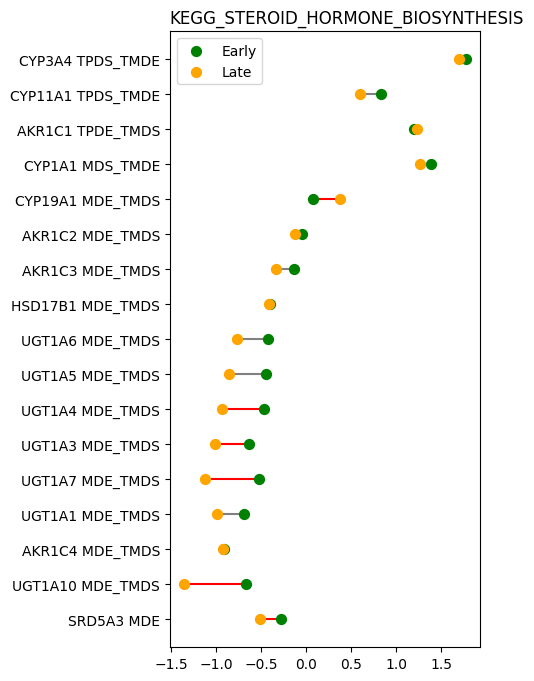

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172

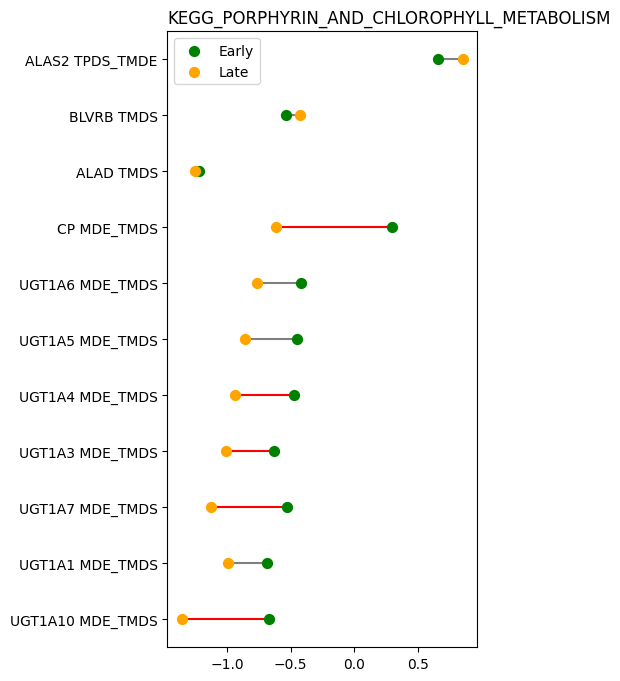

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172

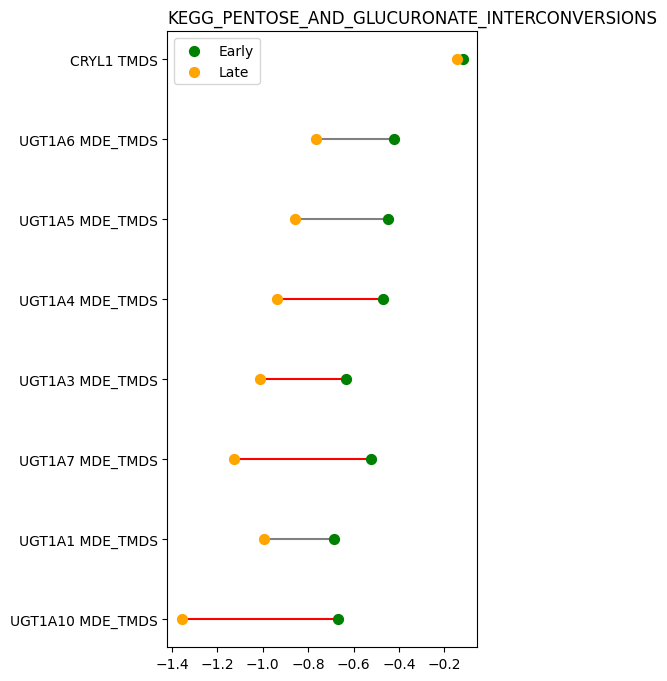

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172

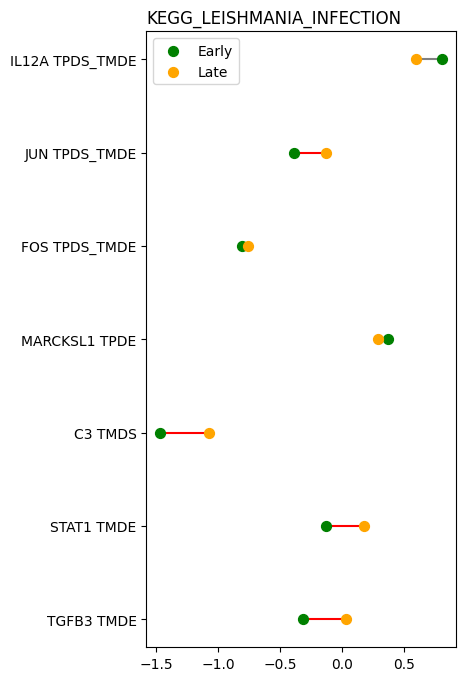

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172

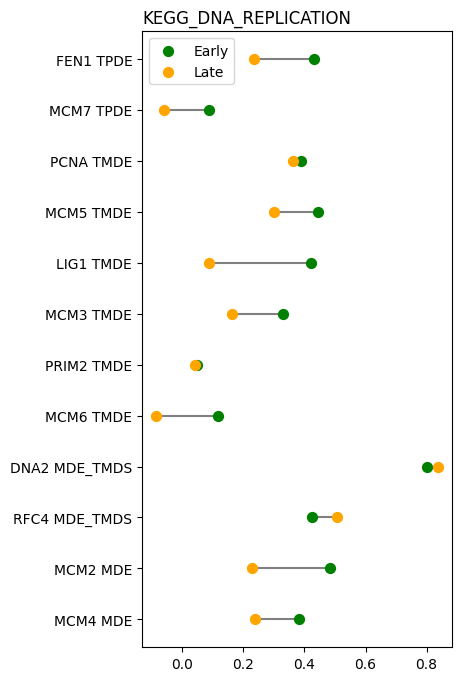

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172

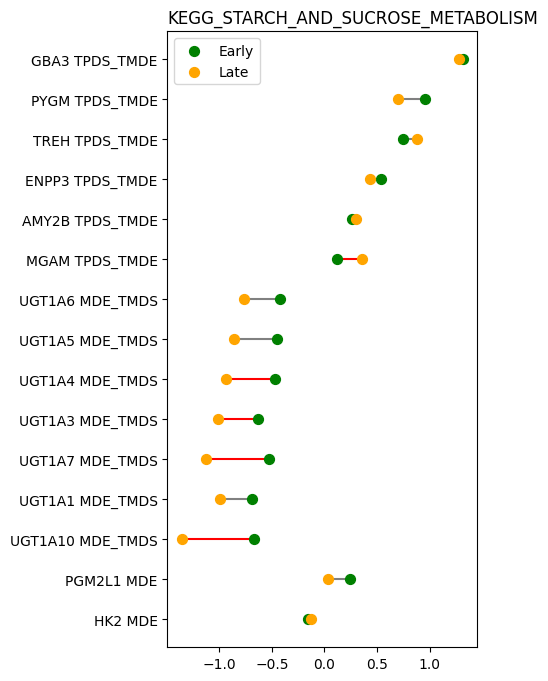

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172

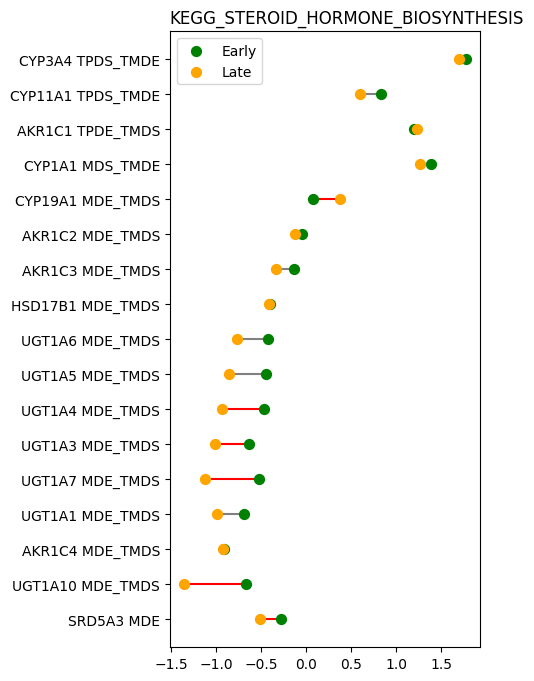

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172

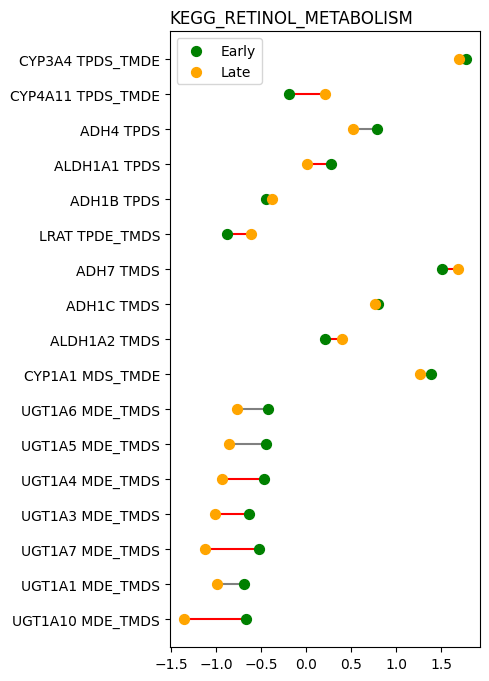

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172

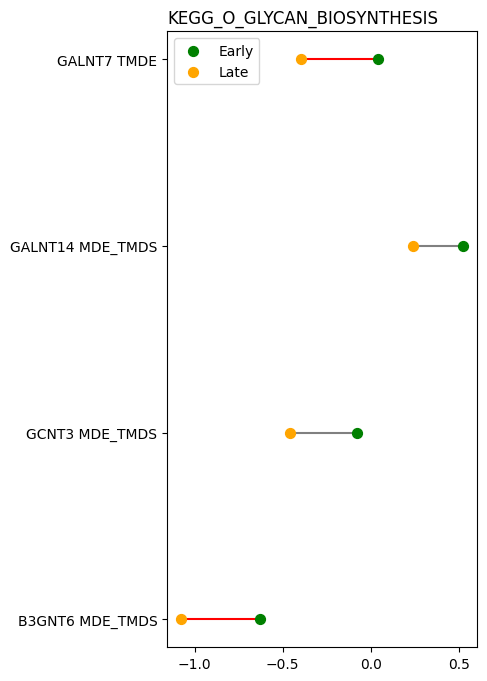

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172

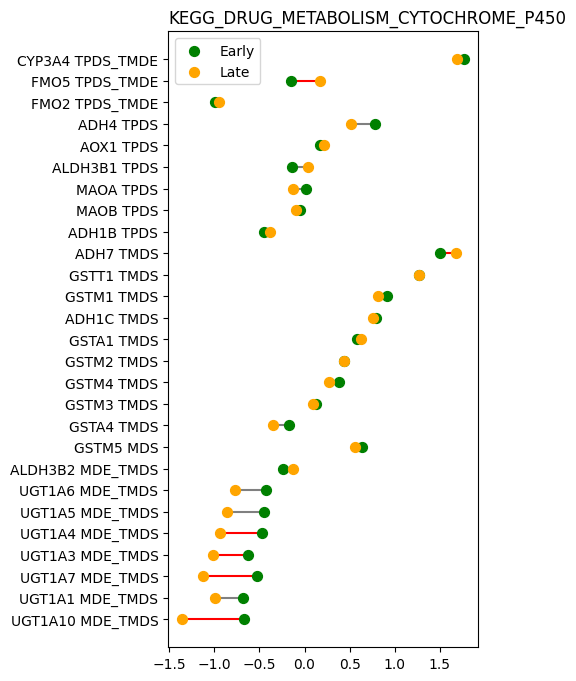

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172

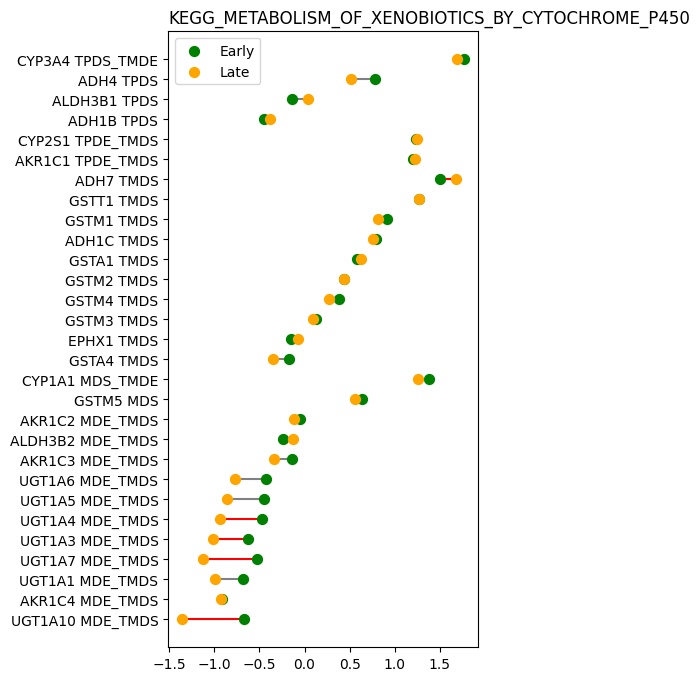

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172

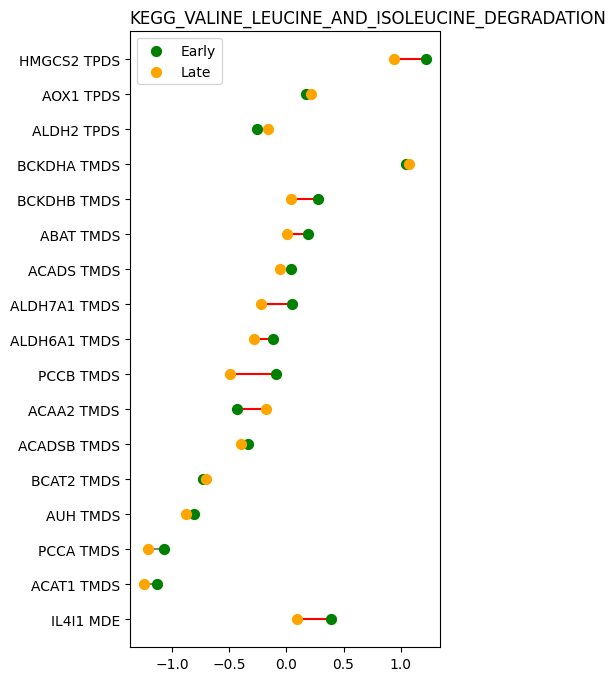

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172

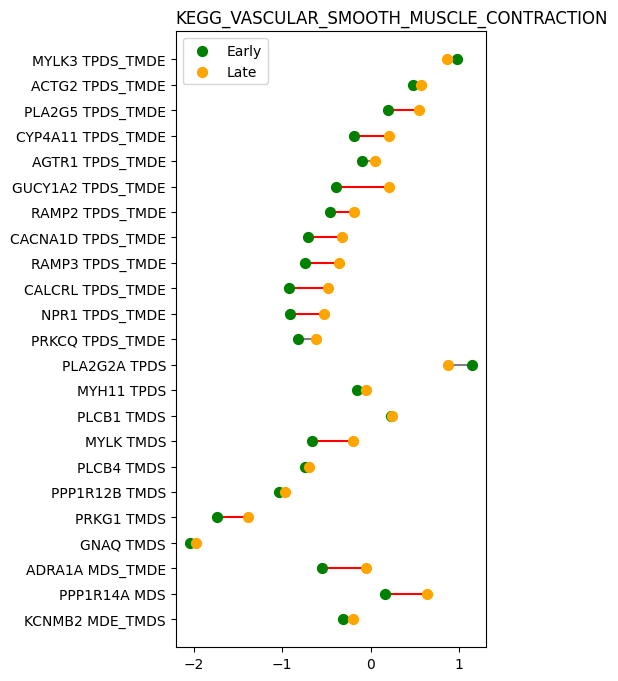

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172697728.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2172

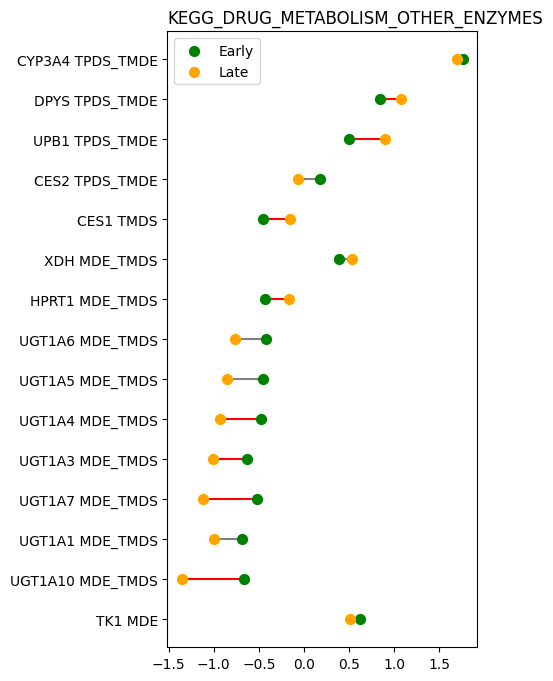

In [11]:
plt.rcParams["figure.figsize"] = (4, 8)
plt.rcParams['svg.fonttype'] = 'none'

for k in ['KEGG_STEROID_HORMONE_BIOSYNTHESIS', 'KEGG_PORPHYRIN_AND_CHLOROPHYLL_METABOLISM', 
          'KEGG_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS', 'KEGG_LEISHMANIA_INFECTION',
          'KEGG_DNA_REPLICATION',
            'KEGG_STARCH_AND_SUCROSE_METABOLISM',
            'KEGG_STEROID_HORMONE_BIOSYNTHESIS',
            'KEGG_RETINOL_METABOLISM',
            'KEGG_O_GLYCAN_BIOSYNTHESIS',
            'KEGG_DRUG_METABOLISM_CYTOCHROME_P450',
            'KEGG_METABOLISM_OF_XENOBIOTICS_BY_CYTOCHROME_P450',
            'KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_DEGRADATION',
            'KEGG_VASCULAR_SMOOTH_MUSCLE_CONTRACTION',
            'KEGG_DRUG_METABOLISM_OTHER_ENZYMES']:
    path_df = df[df.id.isin(pathway_dict[k])]
    lbls = path_df['RG2_Changes_filtered'].values
    path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
    path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
    path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)
    x3 = path_df['id'].values
    y3_new = path_df['Integrated mean (Late)'].values
    y2_new = path_df['Integrated mean (Early)'].values
    line_colours = ['red' if p < 0.05 else 'grey' for p in path_df['Integrated pval (Late-Early)'].values]


    plt.figure()
    plt.hlines(y=x3, xmin = y3_new , xmax = y2_new, color=line_colours)
    plt.scatter(y2_new, x3, color='green', s=50, label='Early', zorder=10)
    plt.scatter(y3_new, x3, color='orange', s=50 , label='Late', zorder=10)
    plt.legend(loc="upper left")

    # # Add title and axis names
    plt.title(k, loc='left')
    plt.savefig(f'Output_Figures/Pathways/{k}.svg')
    plt.show()


In [24]:
plt.rcParams["figure.figsize"] = (4, 8)
plt.rcParams['svg.fonttype'] = 'none'

for k in ['KEGG_STEROID_HORMONE_BIOSYNTHESIS', 'KEGG_PORPHYRIN_AND_CHLOROPHYLL_METABOLISM', 
          'KEGG_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS', 'KEGG_LEISHMANIA_INFECTION',
          'KEGG_DNA_REPLICATION',
            'KEGG_STARCH_AND_SUCROSE_METABOLISM',
            'KEGG_STEROID_HORMONE_BIOSYNTHESIS',
            'KEGG_RETINOL_METABOLISM',
            'KEGG_O_GLYCAN_BIOSYNTHESIS',
            'KEGG_DRUG_METABOLISM_CYTOCHROME_P450',
            'KEGG_METABOLISM_OF_XENOBIOTICS_BY_CYTOCHROME_P450',
            'KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_DEGRADATION',
            'KEGG_VASCULAR_SMOOTH_MUSCLE_CONTRACTION',
            'KEGG_DRUG_METABOLISM_OTHER_ENZYMES']:
    path_df = df[df.id.isin(pathway_dict[k])]
    lbls = path_df['RG2_Changes_filtered'].values
    path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
    path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
    path_df.sort_values(['RG2_Changes_filtered', 'avg'], inplace=True)
    print(f'\n{k}\n')
    print('\n'.join([c.split(' ')[0] for c in path_df['id'].values]))



KEGG_STEROID_HORMONE_BIOSYNTHESIS

SRD5A3
UGT1A10
AKR1C4
UGT1A1
UGT1A7
UGT1A3
UGT1A4
UGT1A5
UGT1A6
HSD17B1
AKR1C3
AKR1C2
CYP19A1
CYP1A1
AKR1C1
CYP11A1
CYP3A4

KEGG_PORPHYRIN_AND_CHLOROPHYLL_METABOLISM

UGT1A10
UGT1A1
UGT1A7
UGT1A3
UGT1A4
UGT1A5
UGT1A6
CP
ALAD
BLVRB
ALAS2

KEGG_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS

UGT1A10
UGT1A1
UGT1A7
UGT1A3
UGT1A4
UGT1A5
UGT1A6
CRYL1

KEGG_LEISHMANIA_INFECTION

TGFB3
STAT1
C3
MARCKSL1
FOS
JUN
IL12A

KEGG_DNA_REPLICATION

MCM4
MCM2
RFC4
DNA2
MCM6
PRIM2
MCM3
LIG1
MCM5
PCNA
MCM7
FEN1

KEGG_STARCH_AND_SUCROSE_METABOLISM

HK2
PGM2L1
UGT1A10
UGT1A1
UGT1A7
UGT1A3
UGT1A4
UGT1A5
UGT1A6
MGAM
AMY2B
ENPP3
TREH
PYGM
GBA3

KEGG_STEROID_HORMONE_BIOSYNTHESIS

SRD5A3
UGT1A10
AKR1C4
UGT1A1
UGT1A7
UGT1A3
UGT1A4
UGT1A5
UGT1A6
HSD17B1
AKR1C3
AKR1C2
CYP19A1
CYP1A1
AKR1C1
CYP11A1
CYP3A4

KEGG_RETINOL_METABOLISM

UGT1A10
UGT1A1
UGT1A7
UGT1A3
UGT1A4
UGT1A5
UGT1A6
CYP1A1
ALDH1A2
ADH1C
ADH7
LRAT
ADH1B
ALDH1A1
ADH4
CYP4A11
CYP3A4

KEGG_O_GLYCAN_BIOSYNTHESIS

B3GNT6
GCNT3
G

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2388807878.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['id'] = [f'{g} {lbls[i]}' for i, g in enumerate(path_df['id'].values)]
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2388807878.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['avg'] = (path_df['Integrated mean (Late)'].values + path_df['Integrated mean (Early)'].values)/2
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_29287/2388